Assignment Part-I </br>

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

 

Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action="ignore")
pd.set_option("display.max_columns",500)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
import statsmodels.api as sm

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.feature_selection import RFE

# EDA

In [2]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df= df.set_index("Id")
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
#Understand the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
#Understand the data

df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### EDA -- 1) Remove null values

In [8]:
#Sum of null value
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [9]:
null = pd.DataFrame(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null.index.name = 'Features'
null.head()

,Null %
Features,
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26


In [13]:
# dataframe with features having null values
null_df = null[null["Null %"] > 0]
null_df

,Null %
Features,
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageType,5.55
GarageCond,5.55
GarageFinish,5.55


In [15]:
#dropping features with more than 40% missing values
df= df.drop(["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"],axis=1)


In [19]:
null = pd.DataFrame(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null.index.name = 'Features'
null_df = null[null["Null %"] > 0]
null_df

,Null %
Features,
LotFrontage,17.74
GarageType,5.55
GarageYrBlt,5.55
GarageCond,5.55
GarageQual,5.55
GarageFinish,5.55
BsmtExposure,2.60
BsmtFinType2,2.60
BsmtFinType1,2.53


### EDA -- 2) Impute missing values

In [21]:
df.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [22]:
# Impute missing values with median
fill_median=df.LotFrontage.median()
df.LotFrontage.fillna(fill_median, inplace=True)

In [23]:
df.LotFrontage.isnull().sum()

0

In [24]:
df.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [25]:
#Impute missing values with Attchd (most common class)
fill=df.GarageType.value_counts().index[0]
df["GarageType"]= df.GarageType.fillna(fill)

In [26]:
df.GarageYrBlt.value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [28]:
# Impute missing values with median
fill_median = df["GarageYrBlt"].median()
df.GarageYrBlt.fillna(fill_median, inplace=True)

In [33]:
#Impute missing values with most common class
fill=df.GarageFinish.value_counts().index[0]
df.GarageFinish= df.GarageFinish.fillna(fill)

fill=df.GarageCond.value_counts().index[0]
df.GarageCond= df.GarageCond.fillna(fill)

fill=df.GarageQual.value_counts().index[0]
df.GarageQual= df.GarageQual.fillna(fill)

fill=df.BsmtExposure.value_counts().index[0]
df.BsmtExposure= df.BsmtExposure.fillna(fill)

fill=df.BsmtFinType2.value_counts().index[0]
df.BsmtFinType2= df.BsmtFinType2.fillna(fill)

fill=df.BsmtQual.value_counts().index[0]
df.BsmtQual= df.BsmtQual.fillna(fill)

fill=df.BsmtCond.value_counts().index[0]
df.BsmtCond= df.BsmtCond.fillna(fill)

fill=df.BsmtFinType1.value_counts().index[0]
df.BsmtFinType1= df.BsmtFinType1.fillna(fill)

In [35]:
#Rechecking missing values
missing= np.sum(df.isnull())
missing.sort_values(ascending=False)

MasVnrType      8
MasVnrArea      8
Electrical      1
SalePrice       0
Foundation      0
               ..
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Functional      0
MSSubClass      0
Length: 75, dtype: int64

In [39]:
# Impute missing values with median
fill_median = df["MasVnrArea"].median()
df.MasVnrArea.fillna(fill_median, inplace=True)

In [37]:
#Impute missing values with most common class
fill=df.MasVnrType.value_counts().index[0]
df.MasVnrType= df.MasVnrType.fillna(fill)

In [38]:
# Dropping missing values in Electrical
df= df.dropna()
df.isnull().sum().sum()

0

### Checking for data correlations

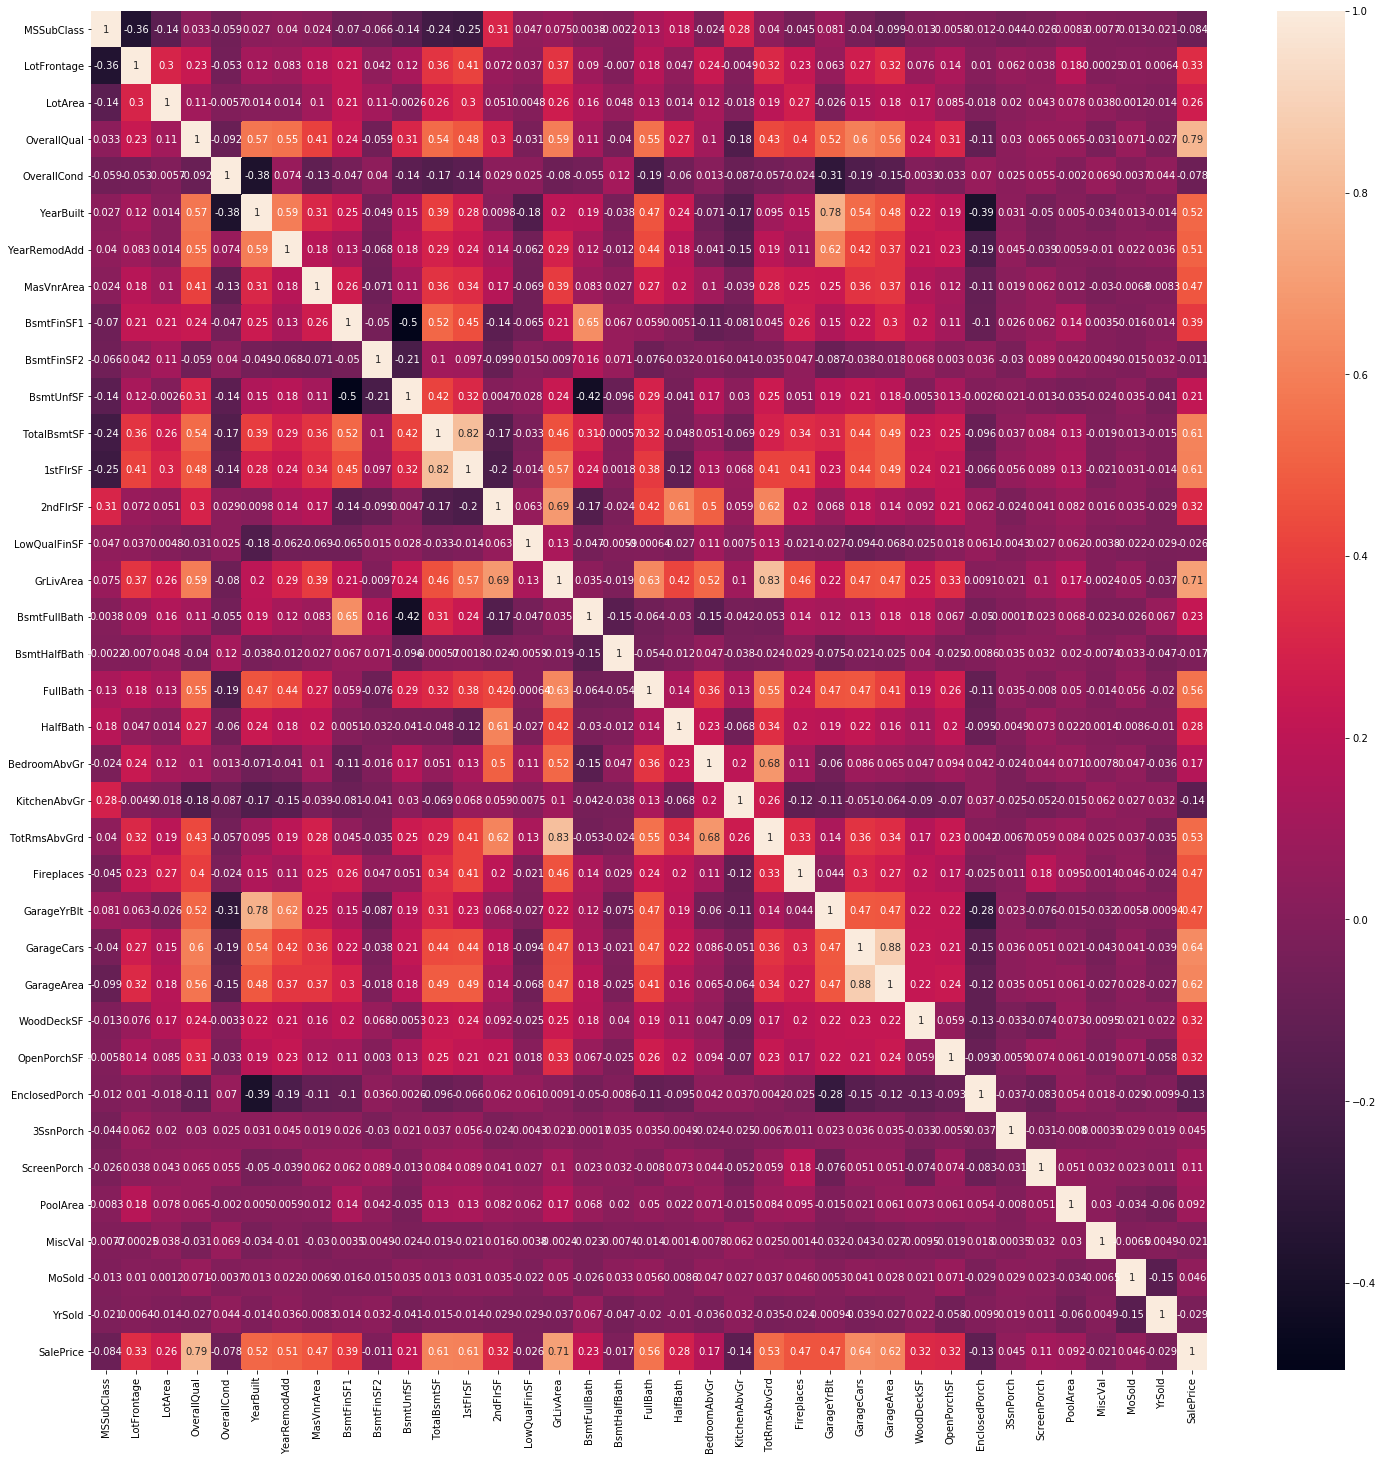

In [40]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True)

In [41]:
df.corr()["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.791069
GrLivArea        0.708618
GarageCars       0.640473
GarageArea       0.623423
TotalBsmtSF      0.613905
1stFlrSF         0.605968
FullBath         0.560881
TotRmsAbvGrd     0.533779
YearBuilt        0.523273
YearRemodAdd     0.507430
MasVnrArea       0.472606
GarageYrBlt      0.467120
Fireplaces       0.466968
BsmtFinSF1       0.386436
LotFrontage      0.334793
WoodDeckSF       0.324422
2ndFlrSF         0.319464
OpenPorchSF      0.315831
HalfBath         0.284400
LotArea          0.263837
BsmtFullBath     0.227082
BsmtUnfSF        0.214446
BedroomAbvGr     0.168235
ScreenPorch      0.111419
PoolArea         0.092397
MoSold           0.046380
3SsnPorch        0.044571
BsmtFinSF2      -0.011412
BsmtHalfBath    -0.016873
MiscVal         -0.021200
LowQualFinSF    -0.025620
YrSold          -0.028907
OverallCond     -0.077924
MSSubClass      -0.084230
EnclosedPorch   -0.128627
KitchenAbvGr    -0.135935
Name: SalePrice, dtype: float64

In [43]:
#deriving a variable which will calculate the age of the house
df['house_age'] = df['YrSold'] - df['YearBuilt']
df = df.drop(['YrSold','YearBuilt'], axis=1)

In [44]:
# Identifying all numerical columns
numeric_col = ["LotFrontage","house_age", 'LotArea', "MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF",
           "1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch",
           "3SsnPorch","ScreenPorch","PoolArea","MiscVal","SalePrice"]

In [46]:
# Identifying all categorical columns
categorical_col= list(set(df.columns)-set(numeric_col))

### Data visualization for numeric features

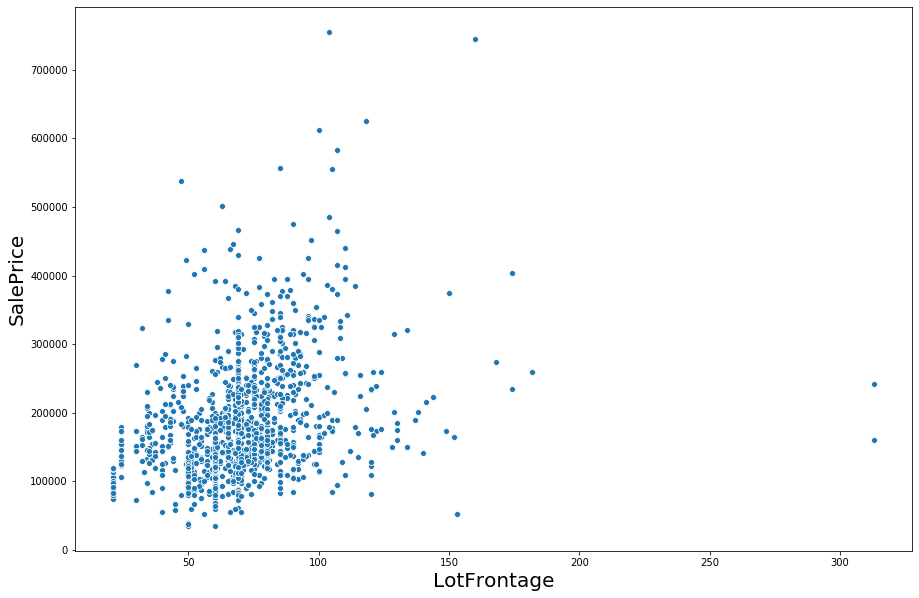

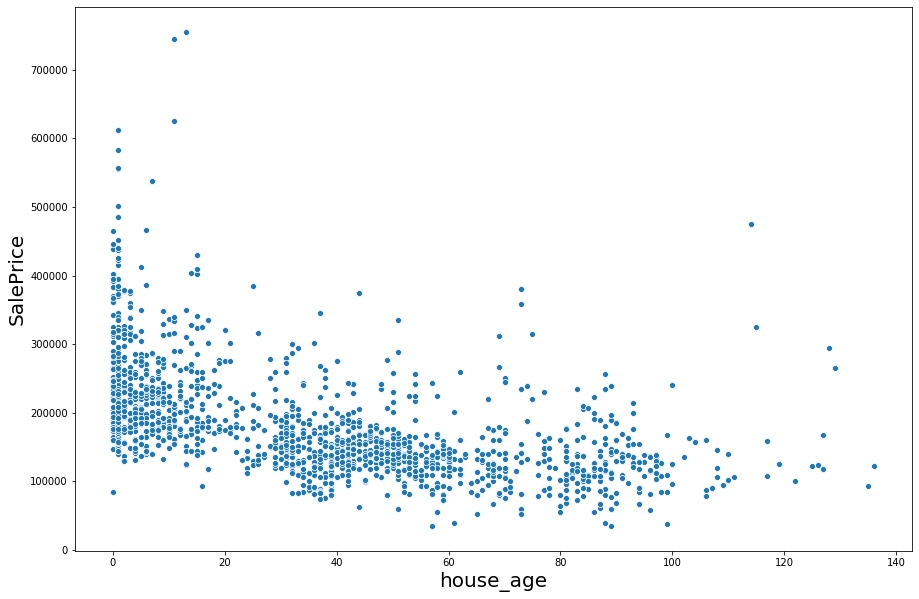

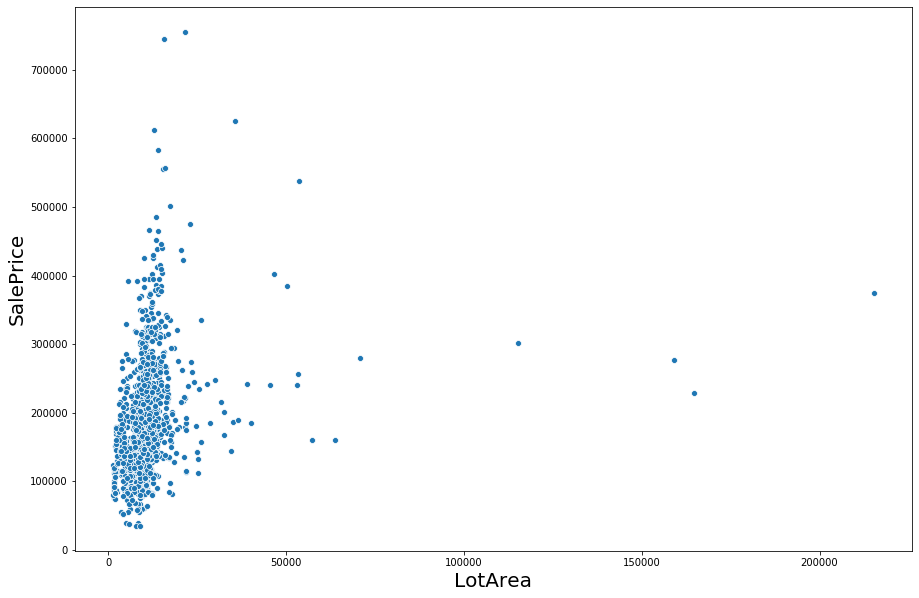

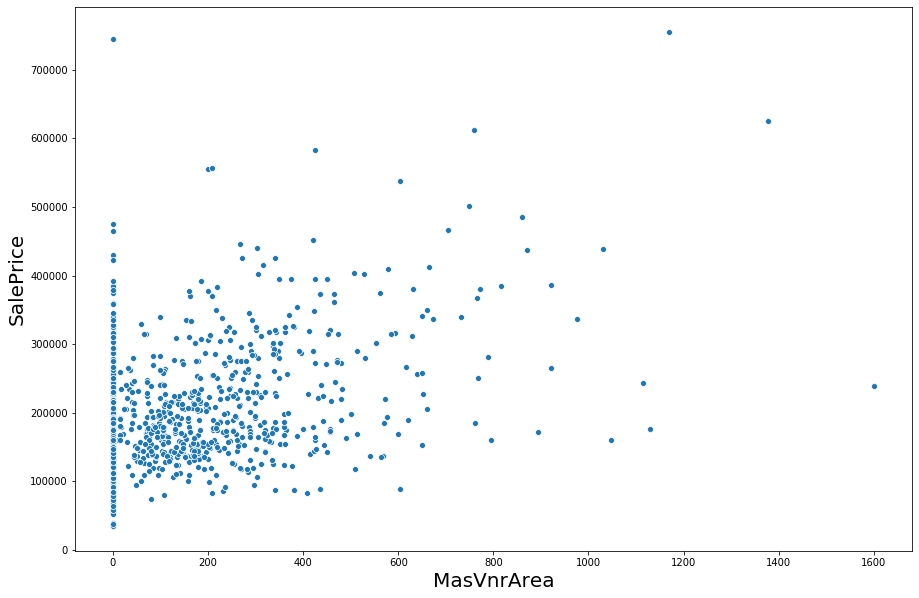

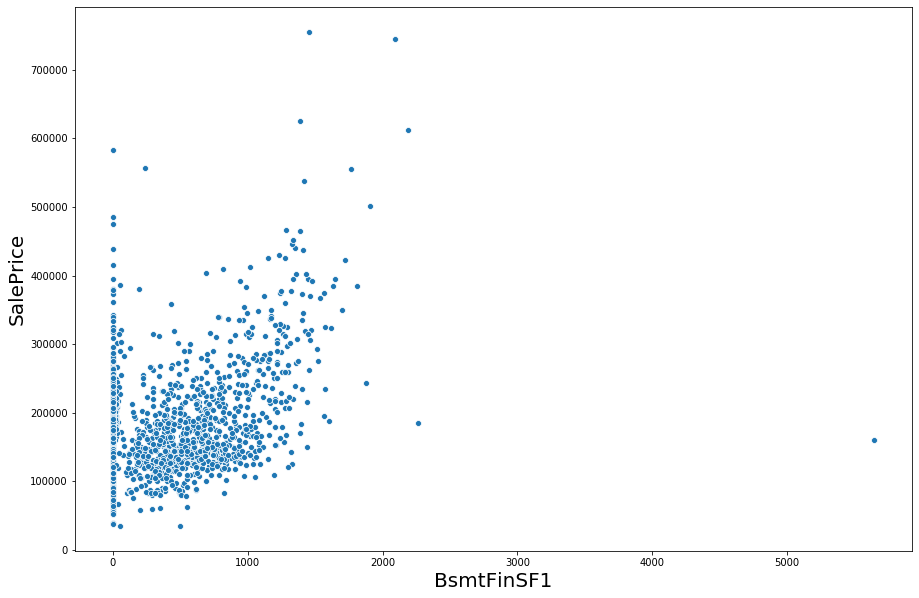

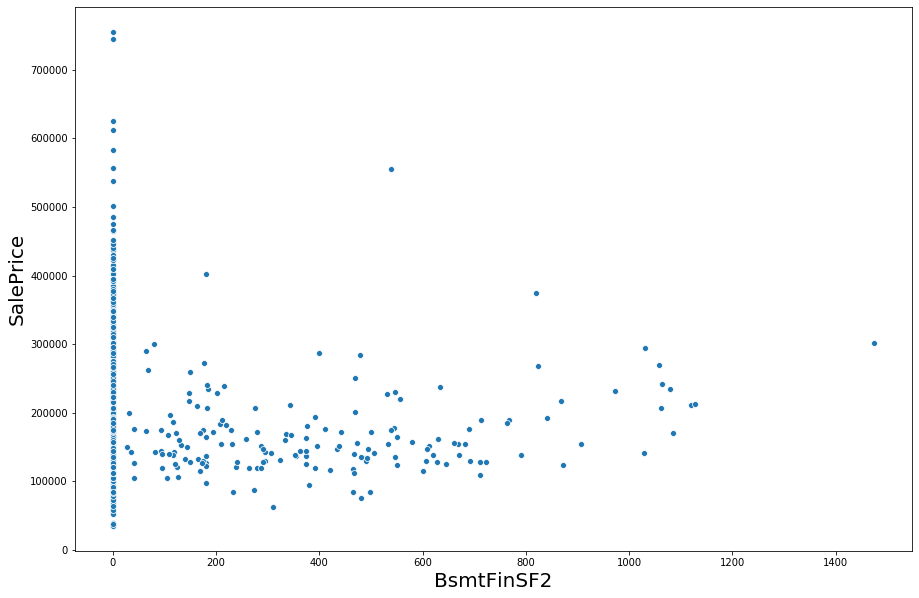

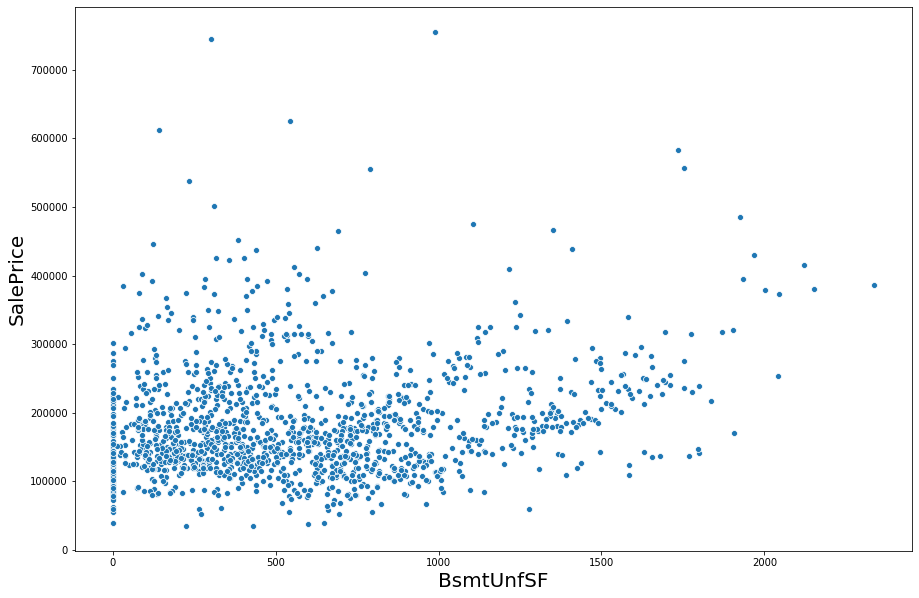

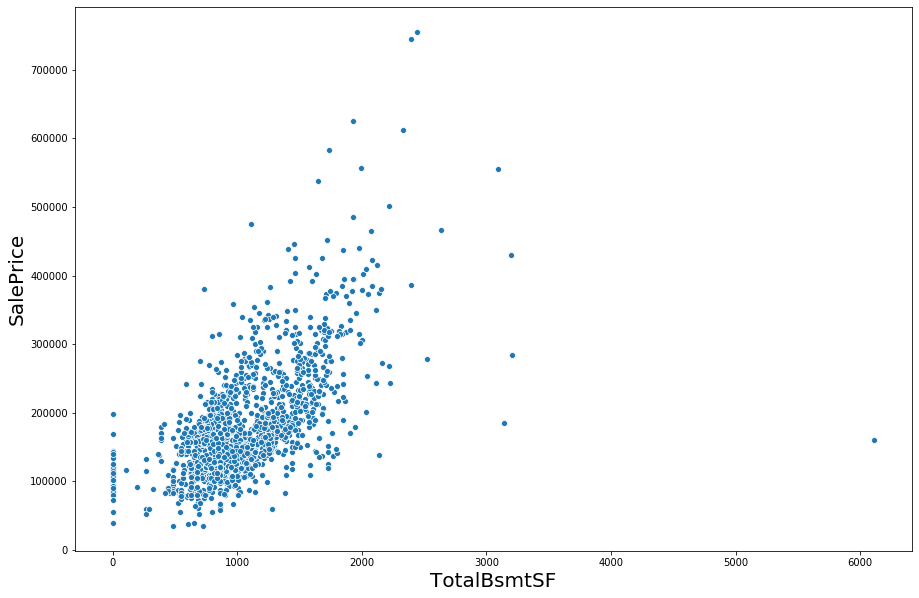

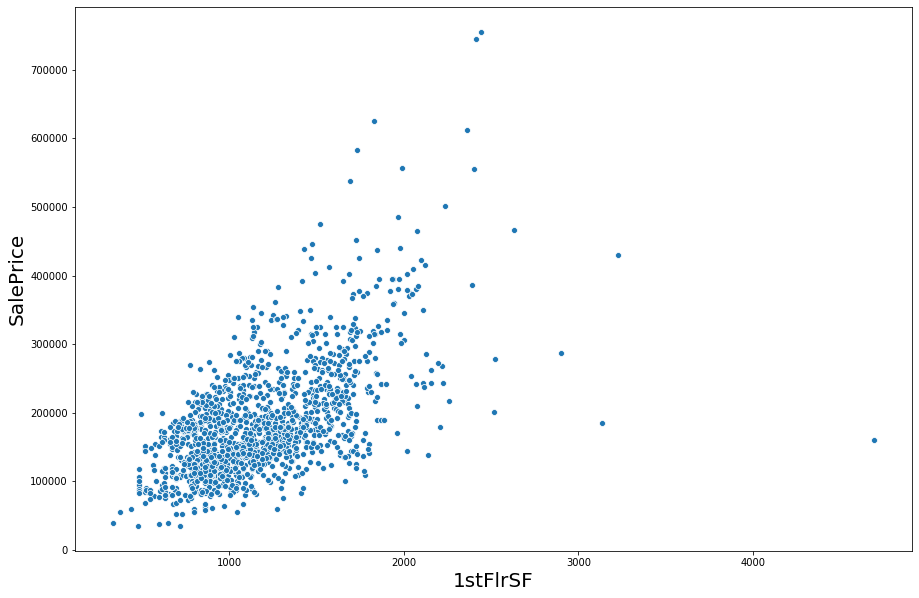

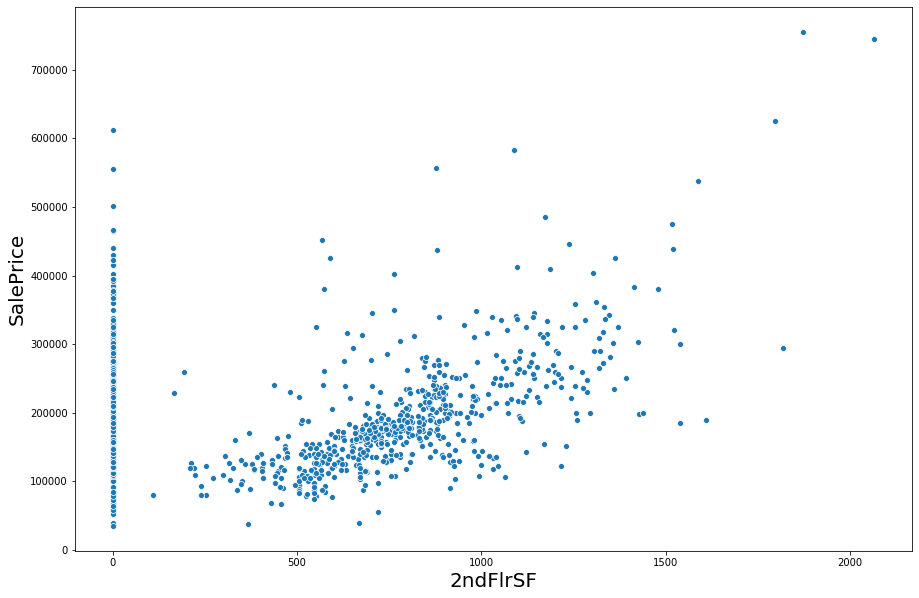

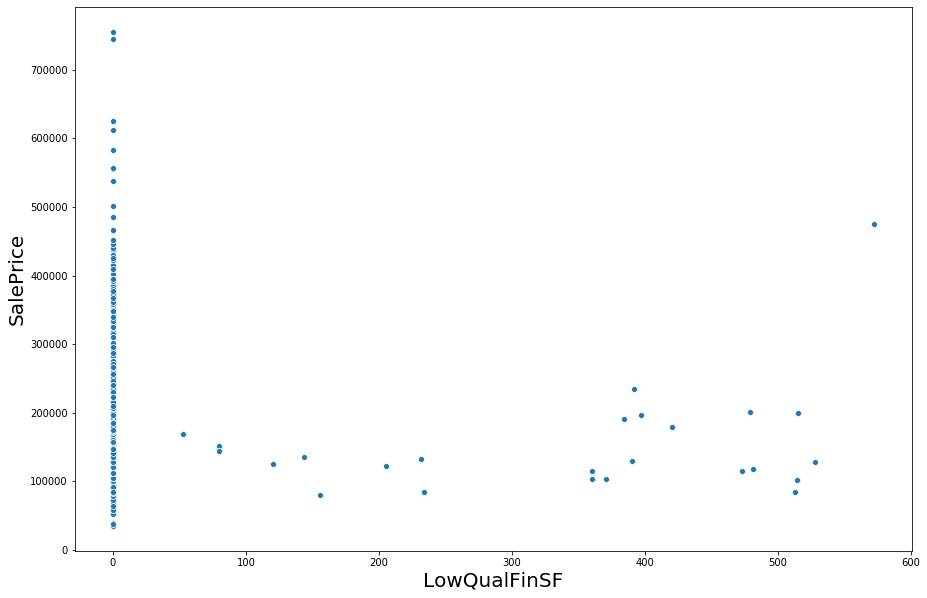

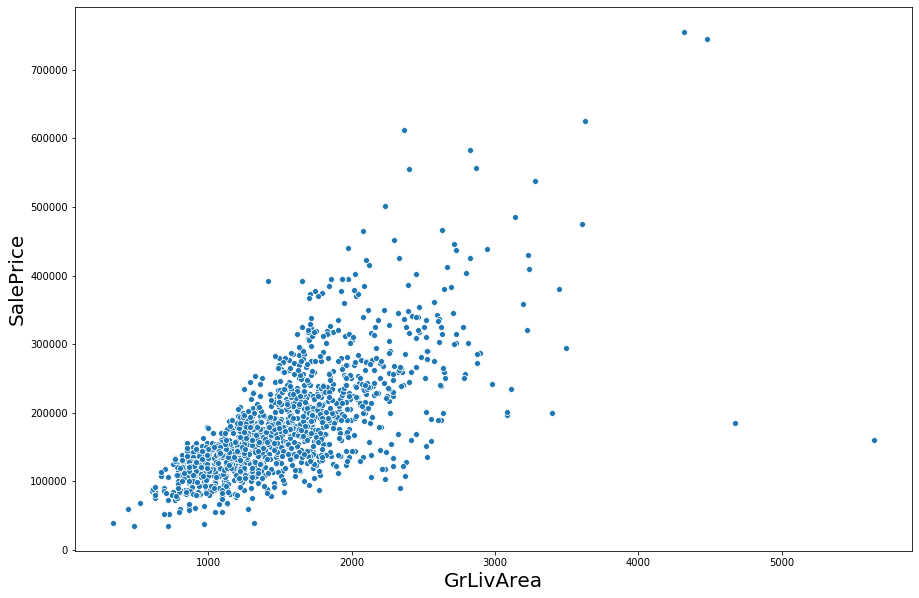

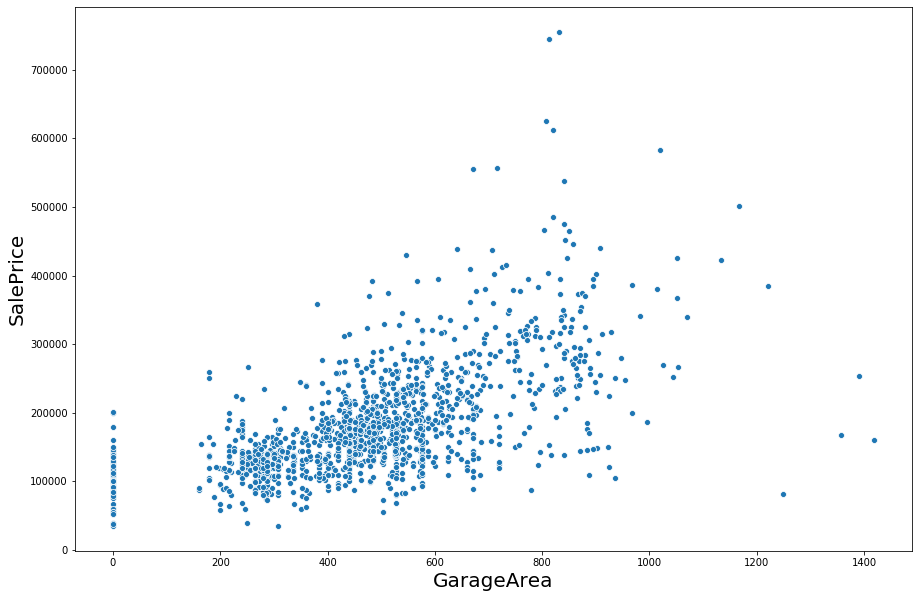

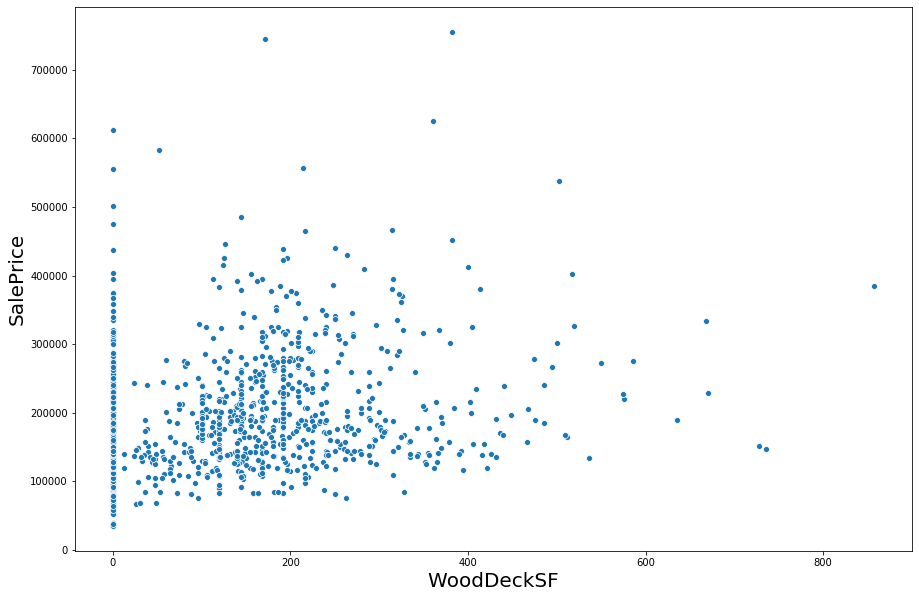

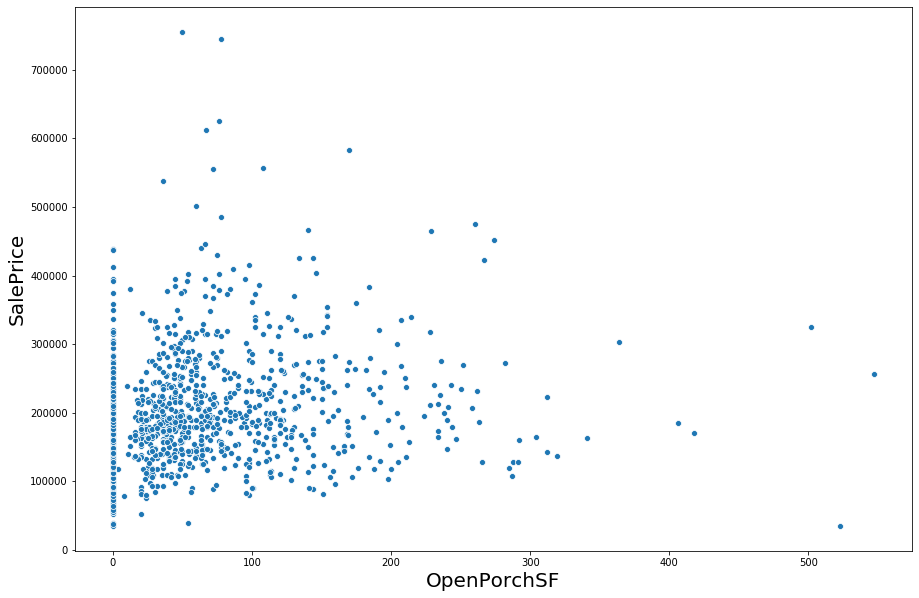

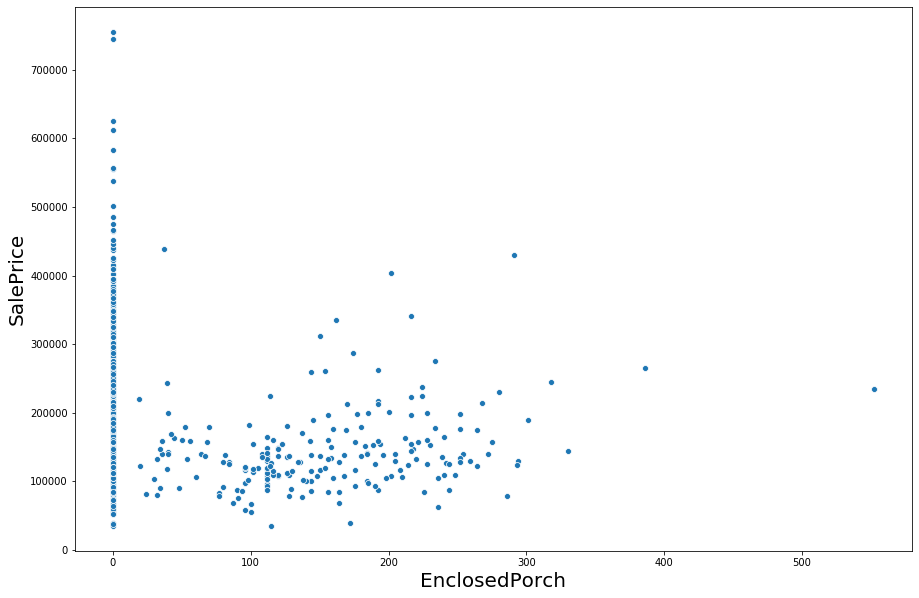

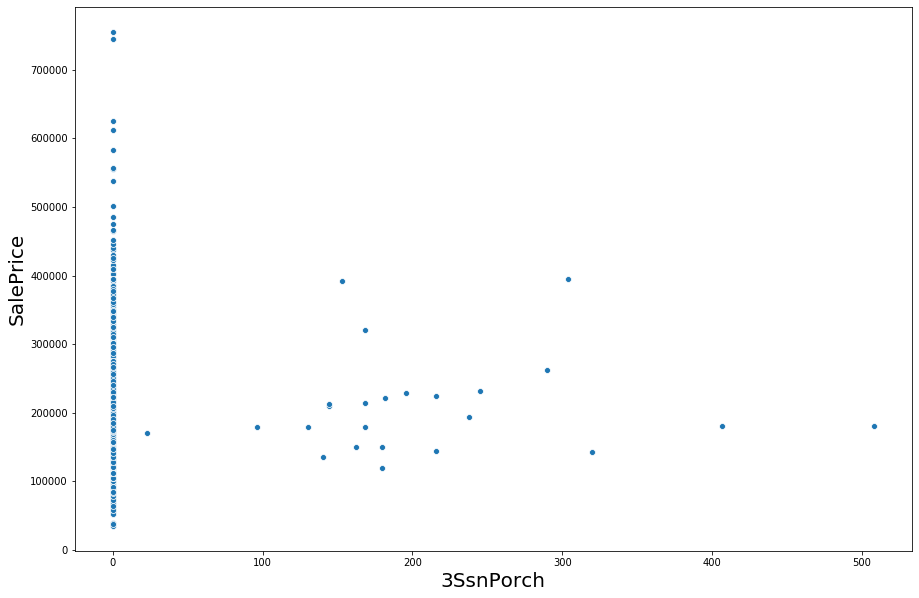

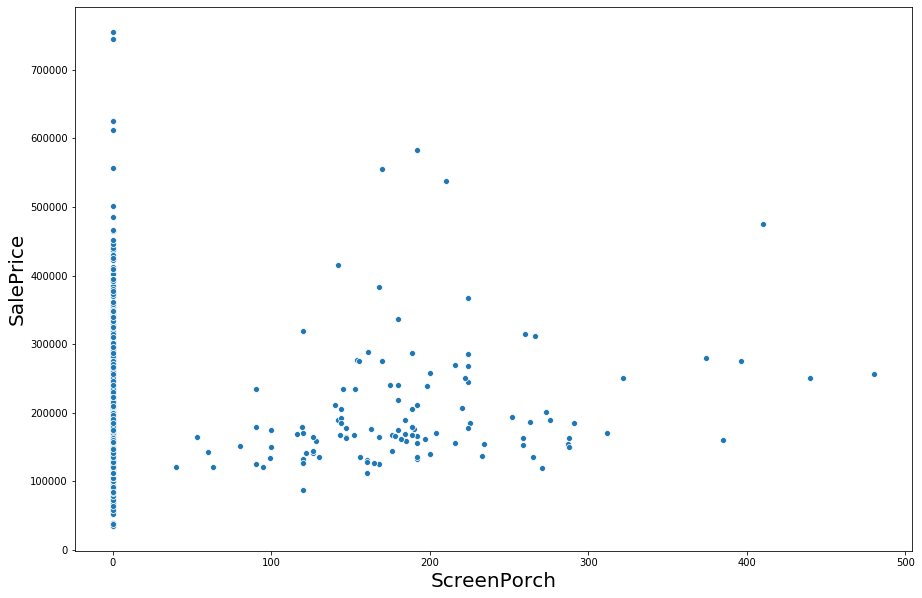

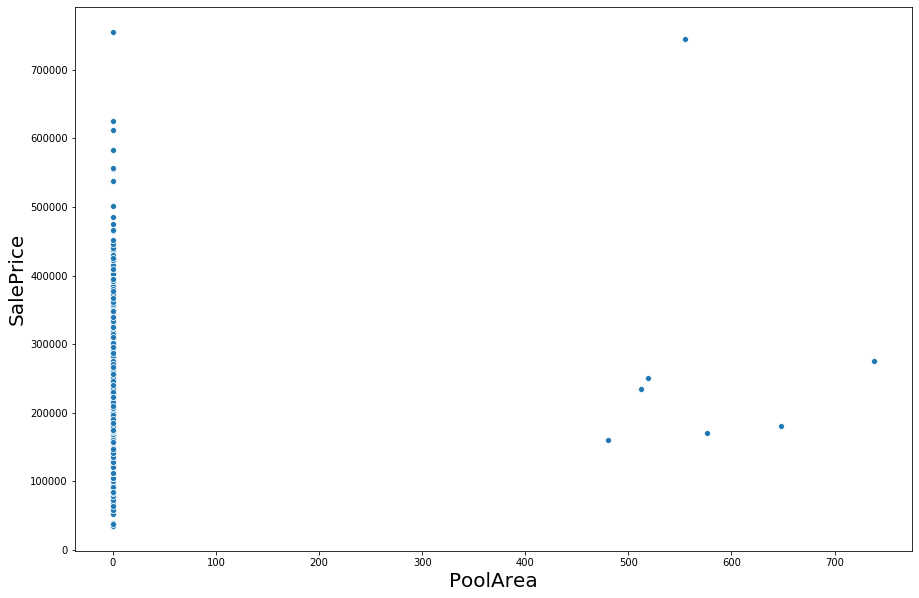

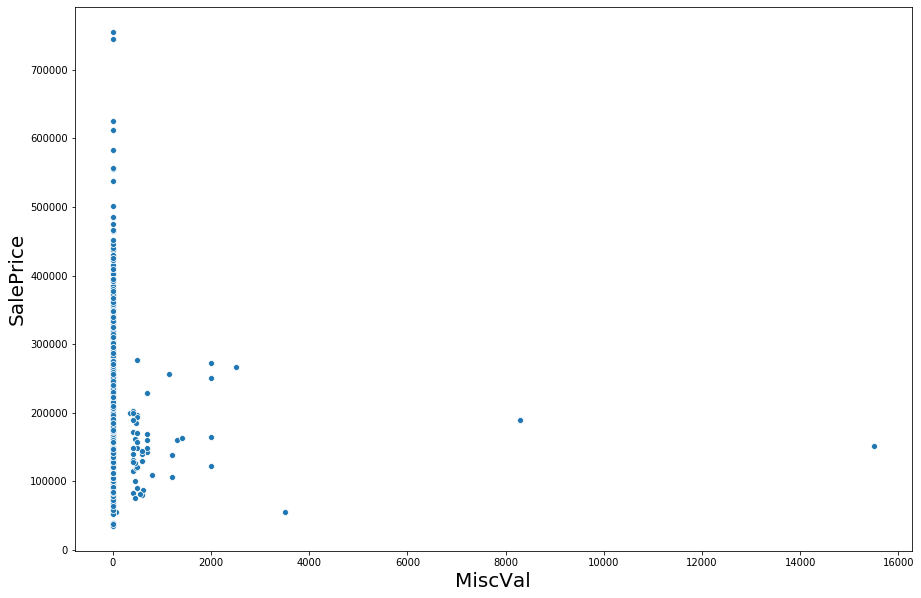

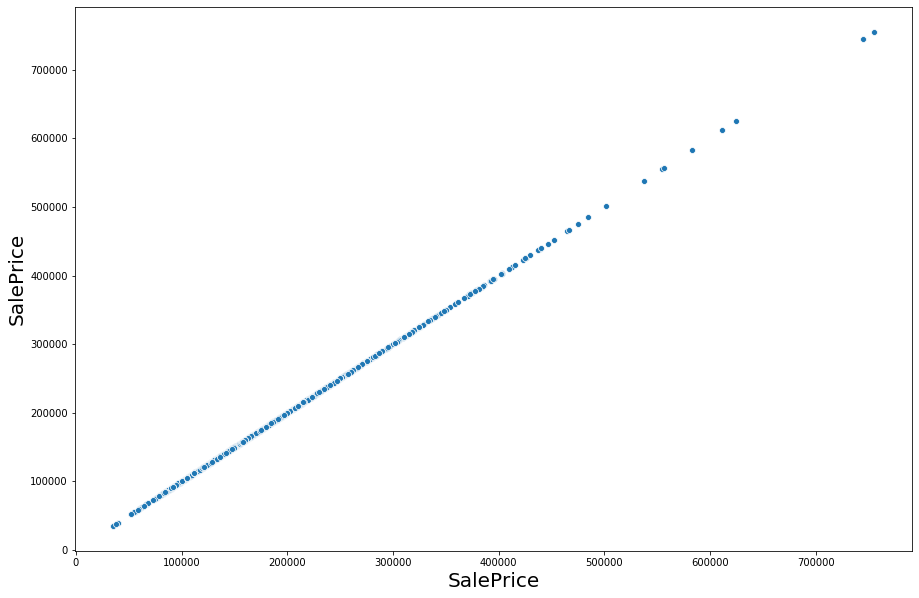

In [49]:
for items in numeric_col:
    sns.set_context( rc={"axes.labelsize":20})
    plt.figure(figsize=(15,10))
    sns.scatterplot(x=items, y="SalePrice", data=df)
    plt.show()

### Data visualization for categorical items

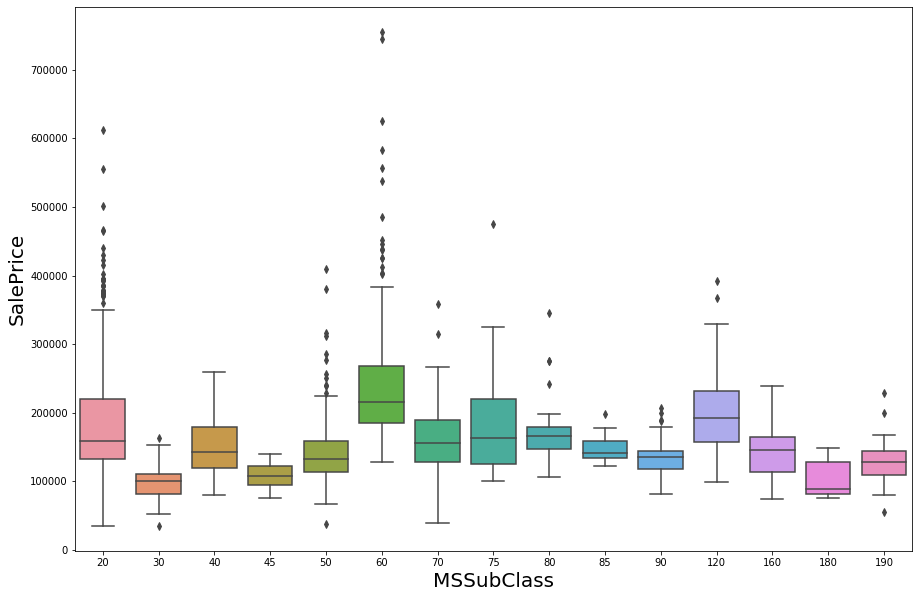

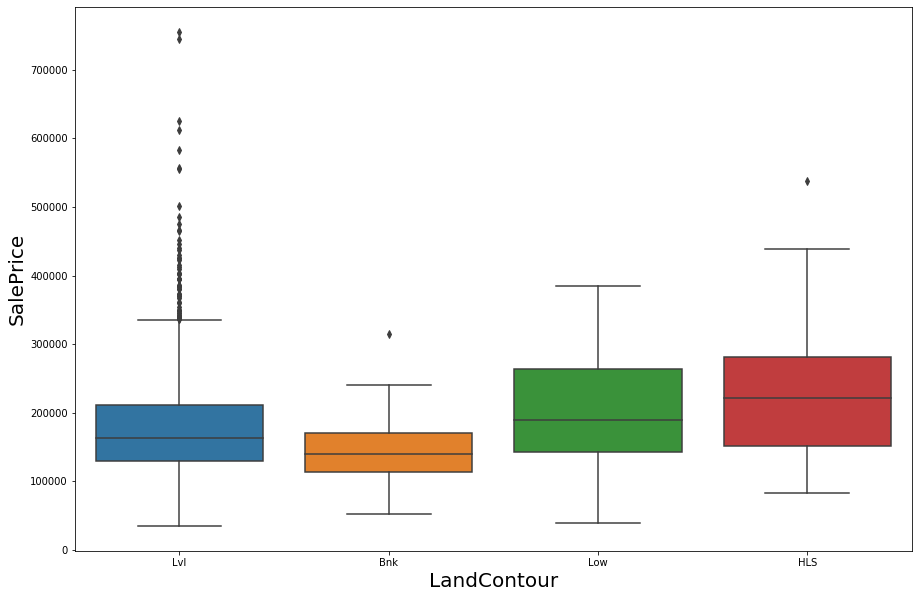

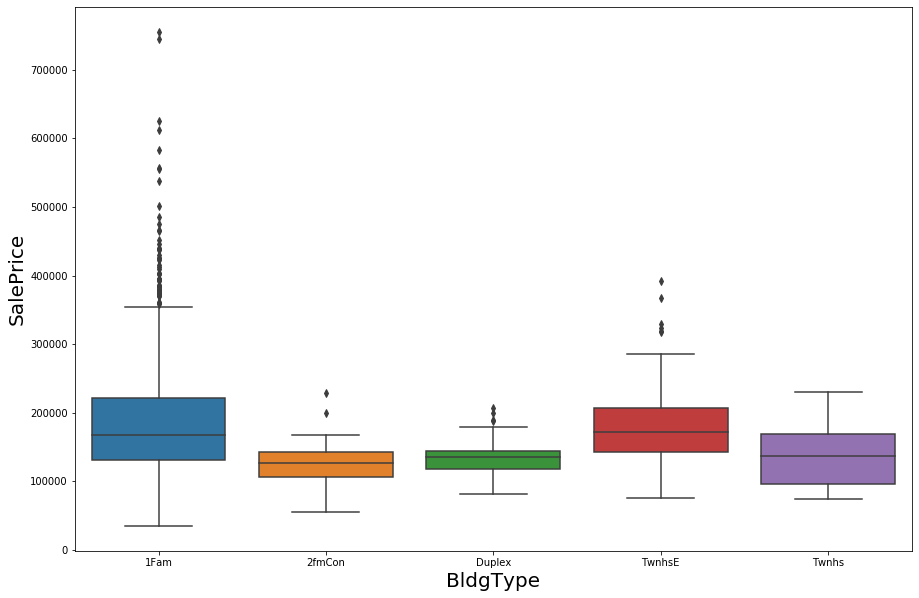

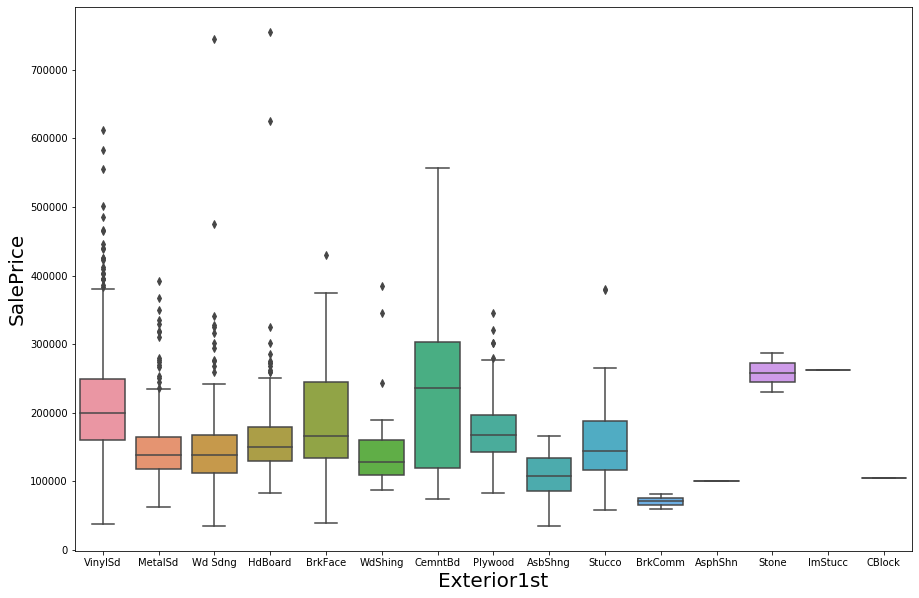

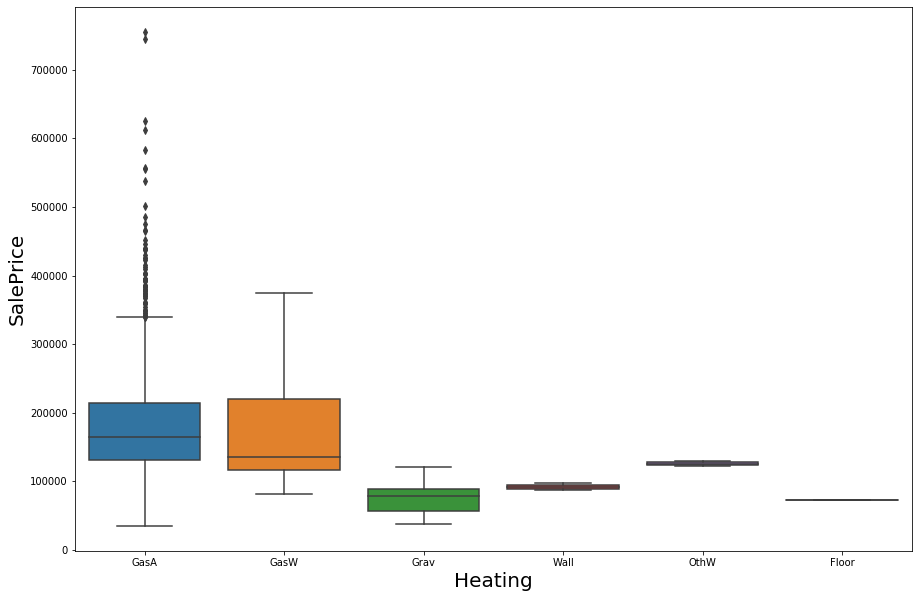

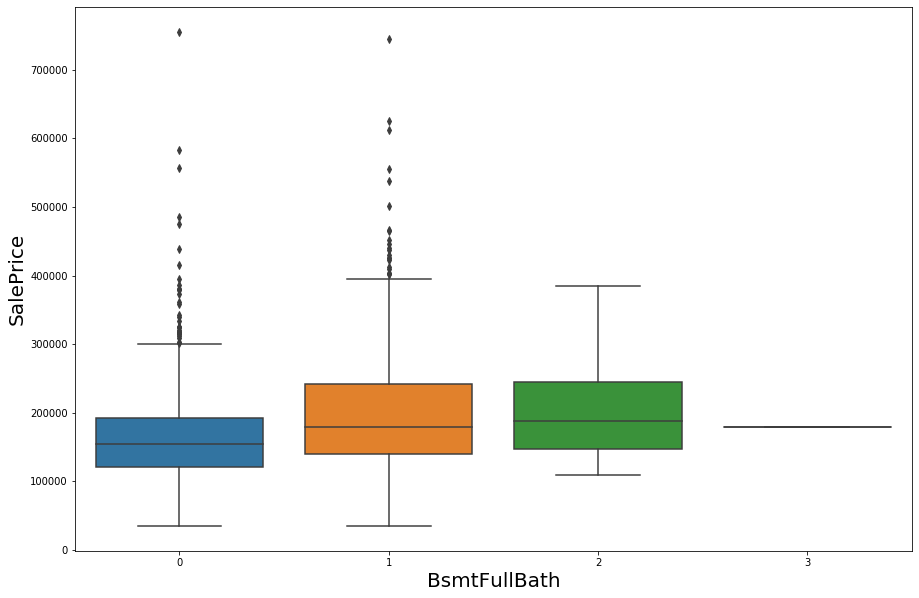

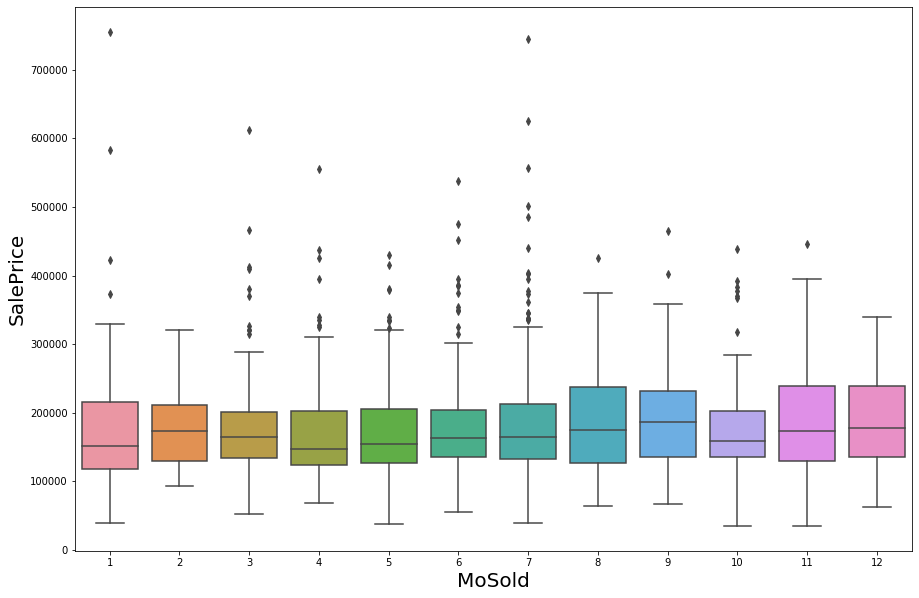

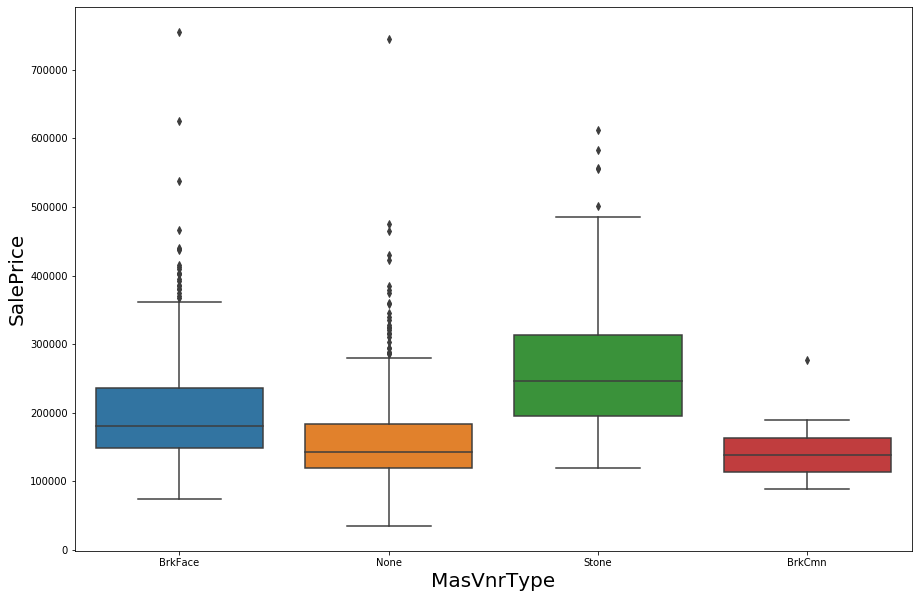

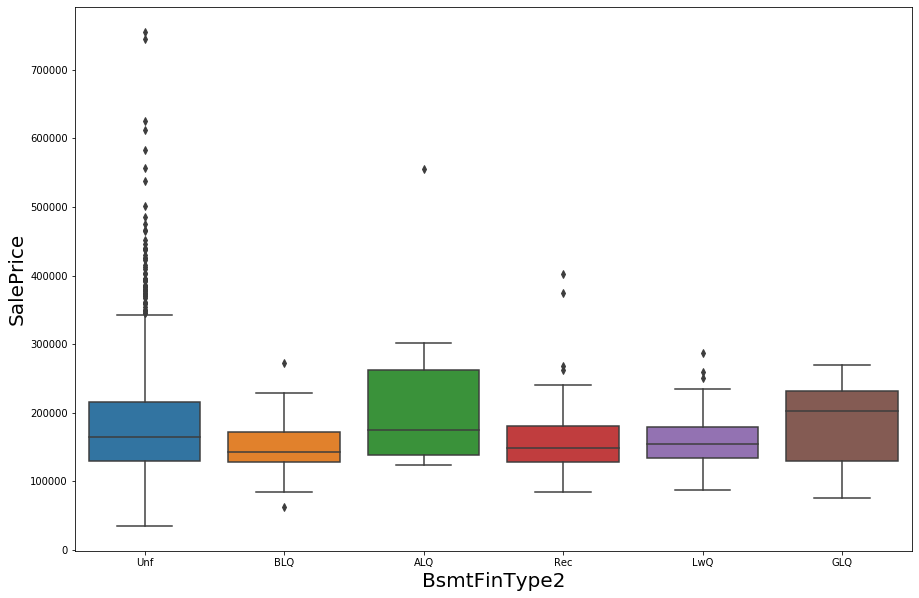

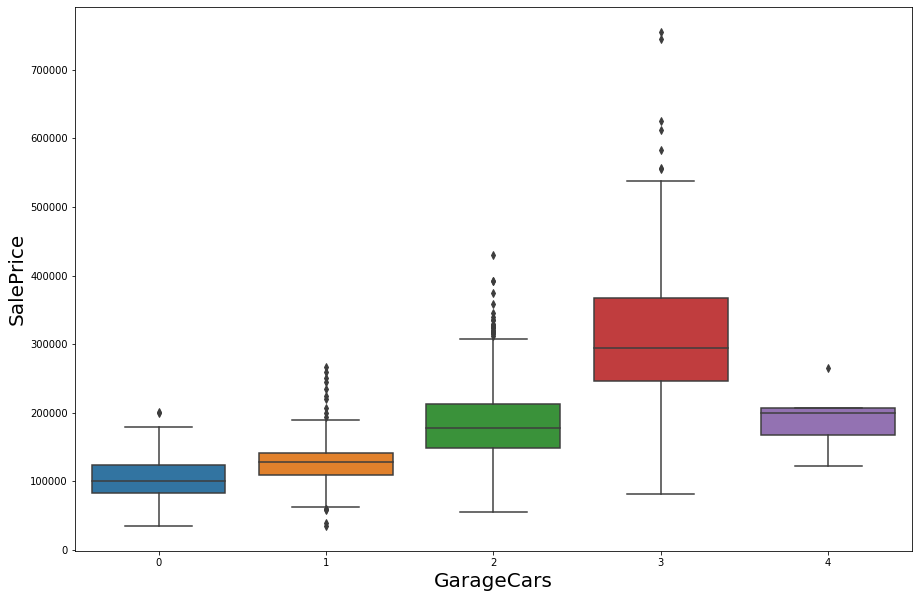

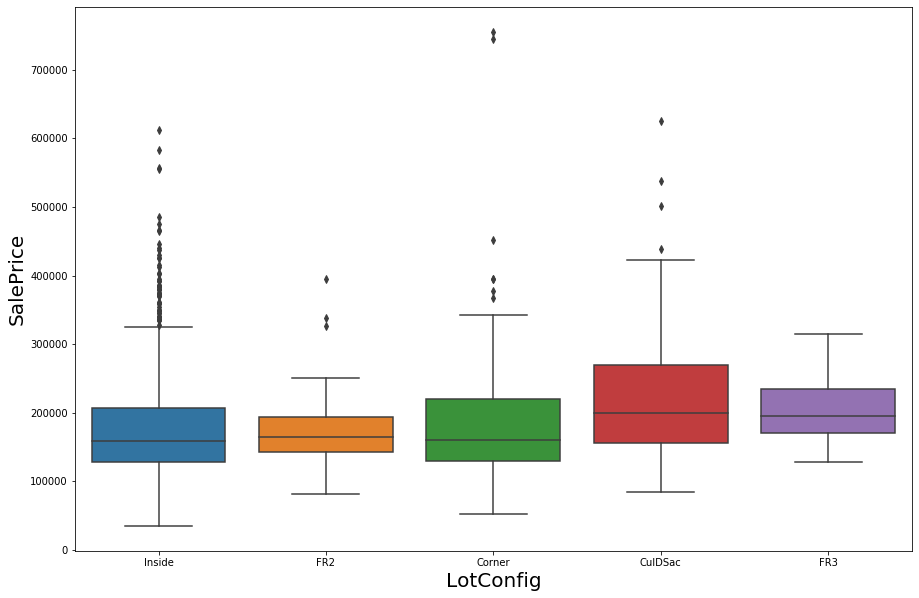

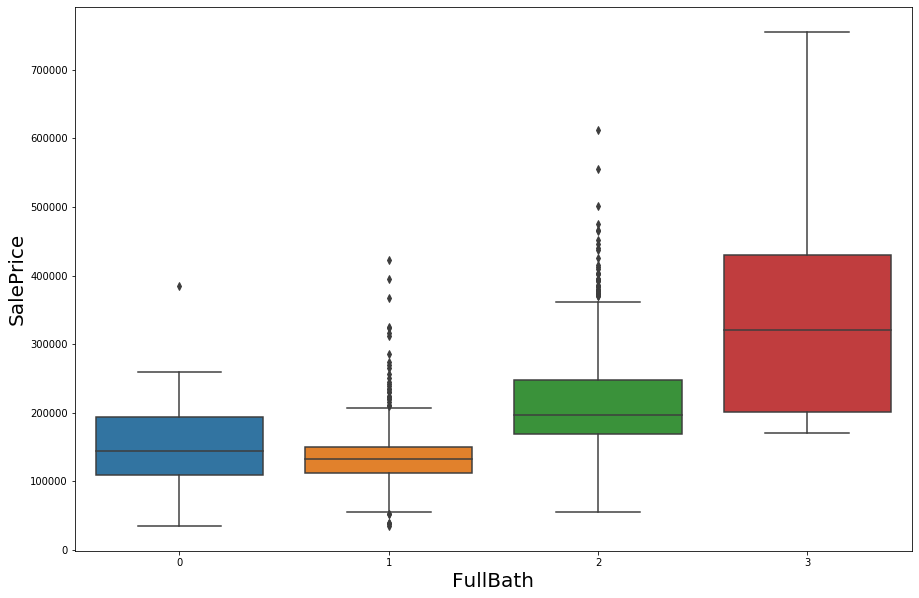

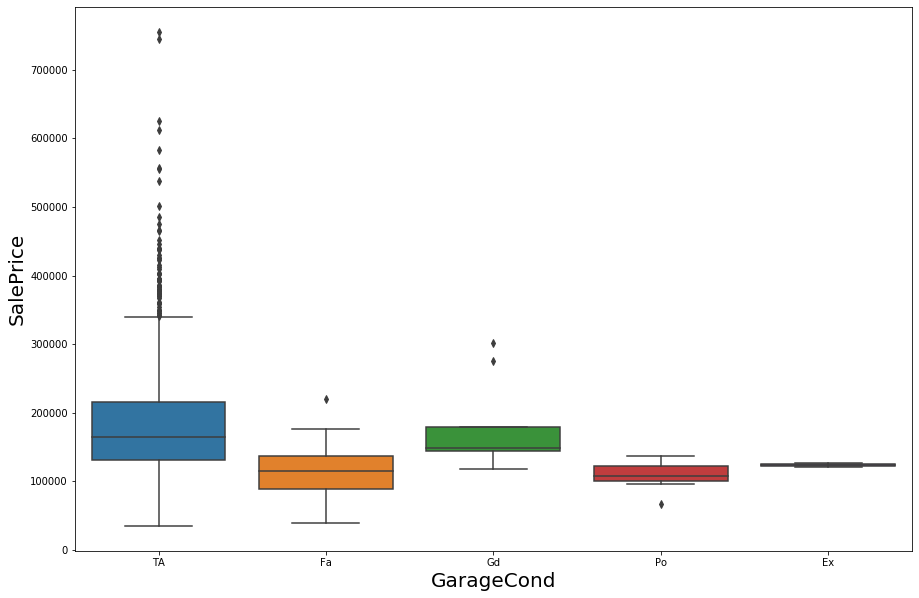

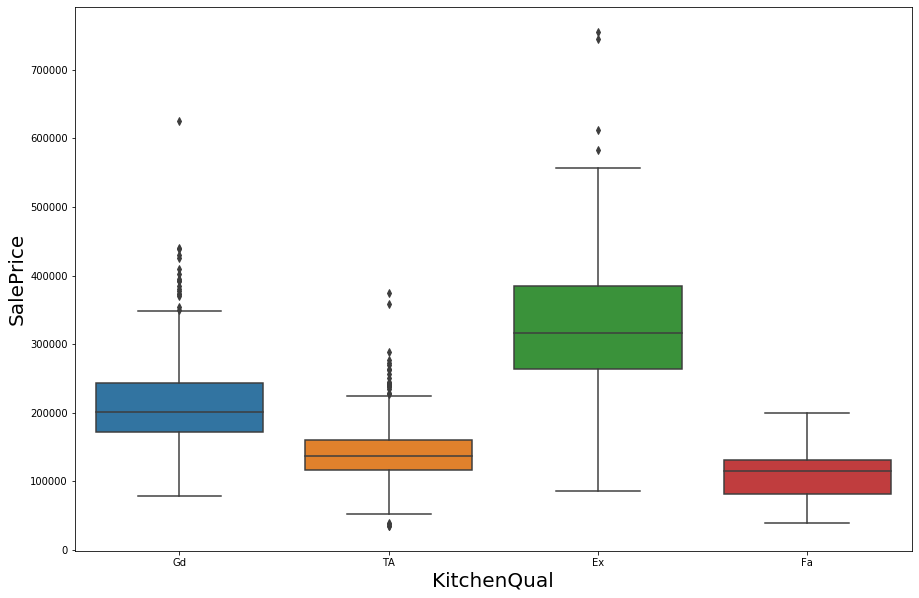

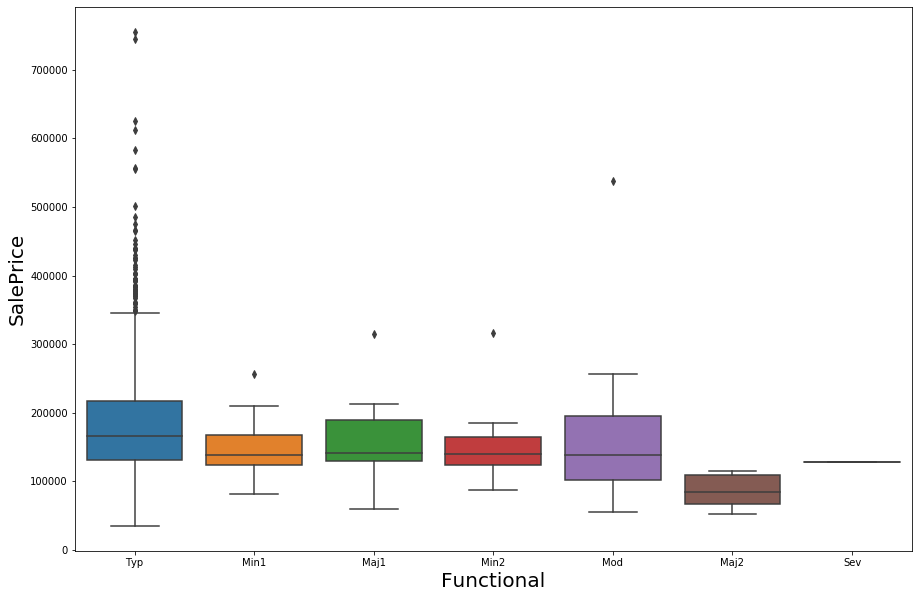

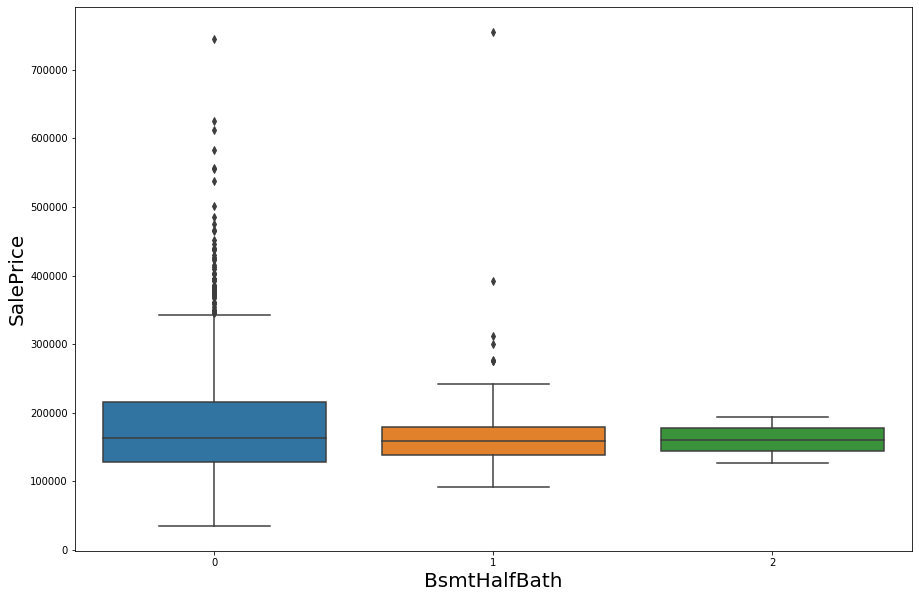

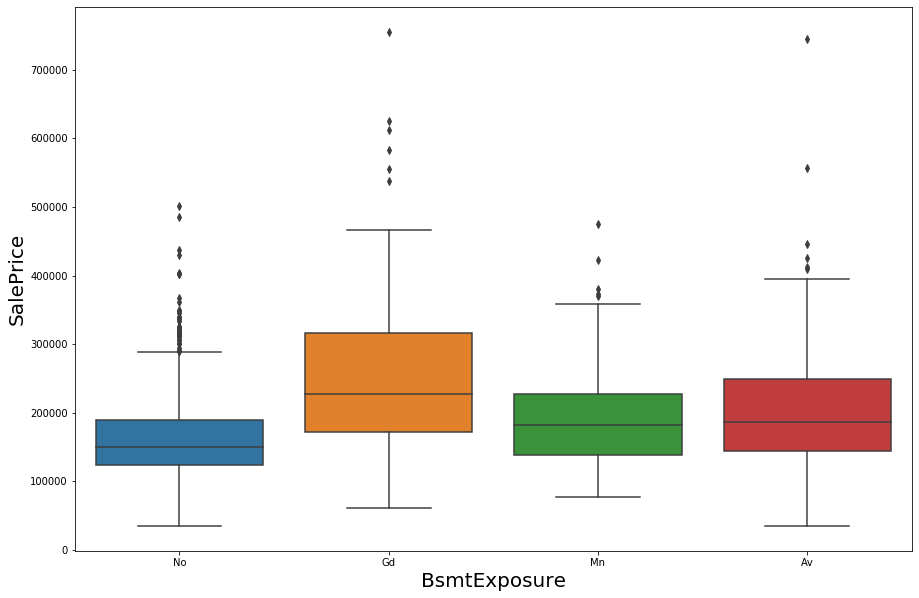

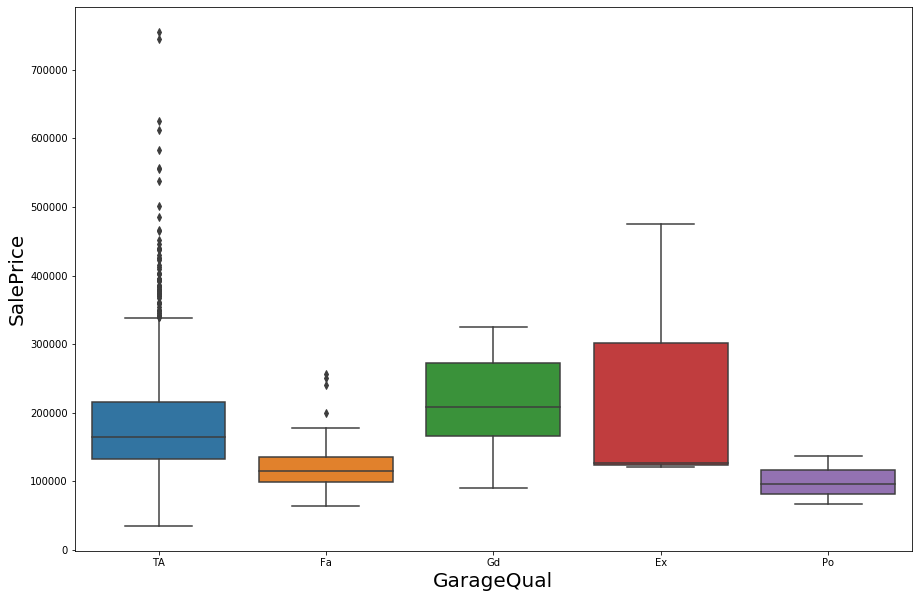

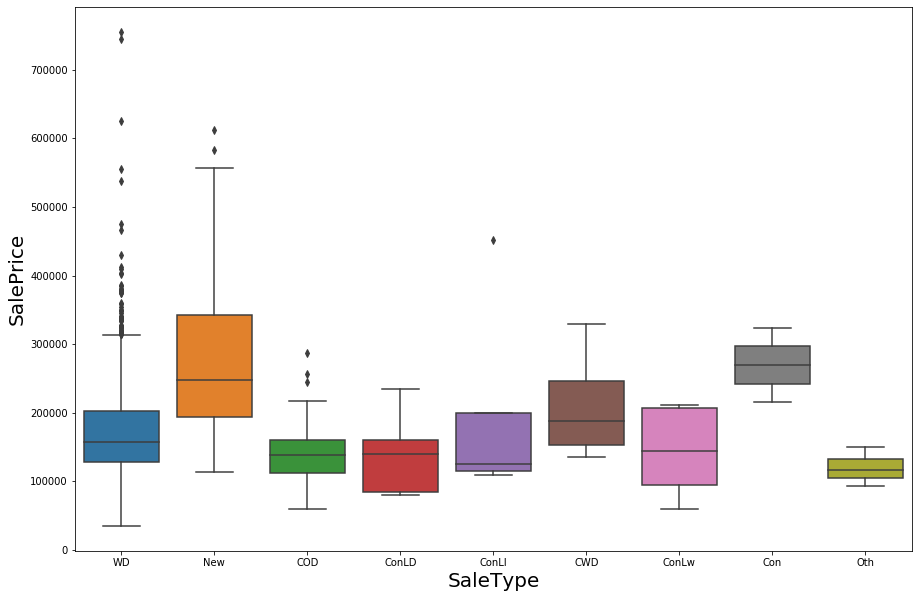

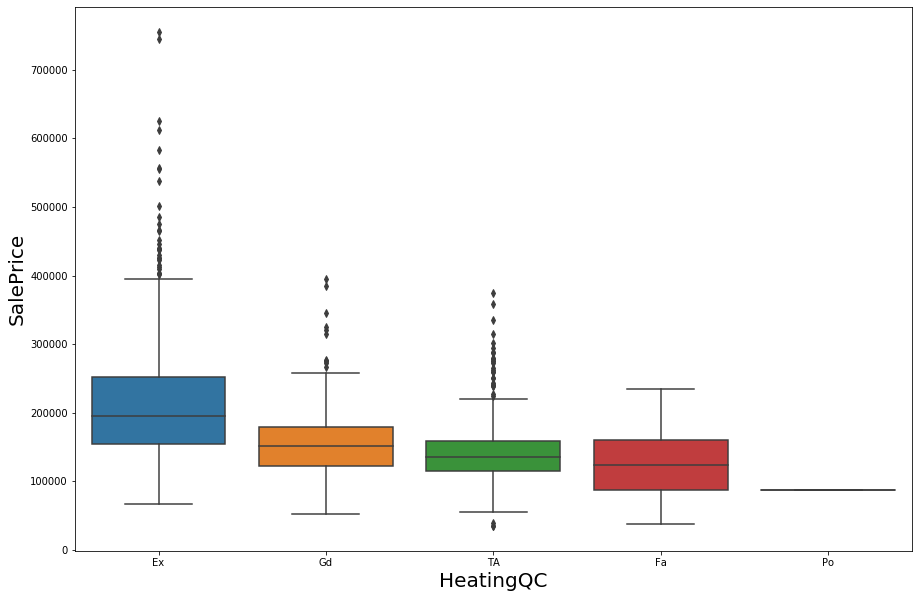

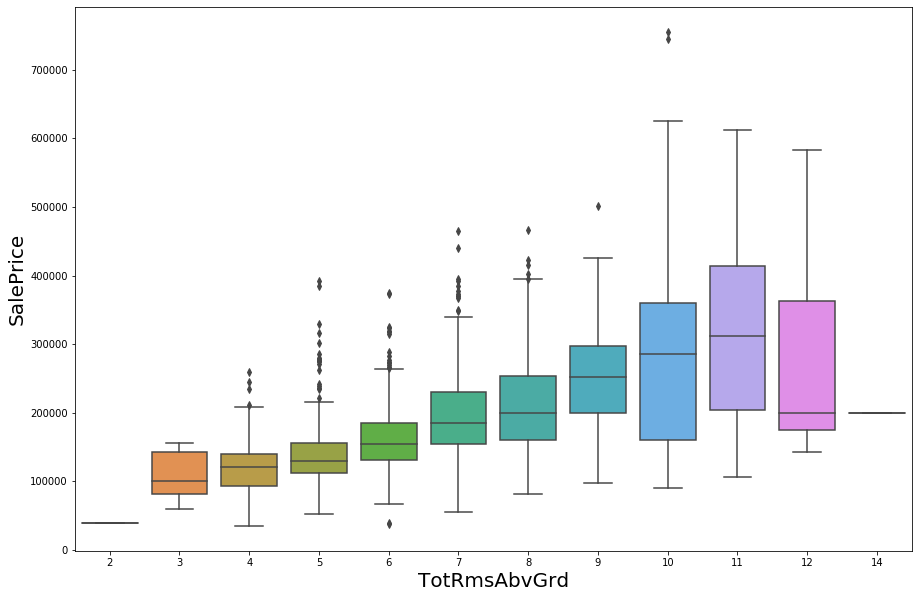

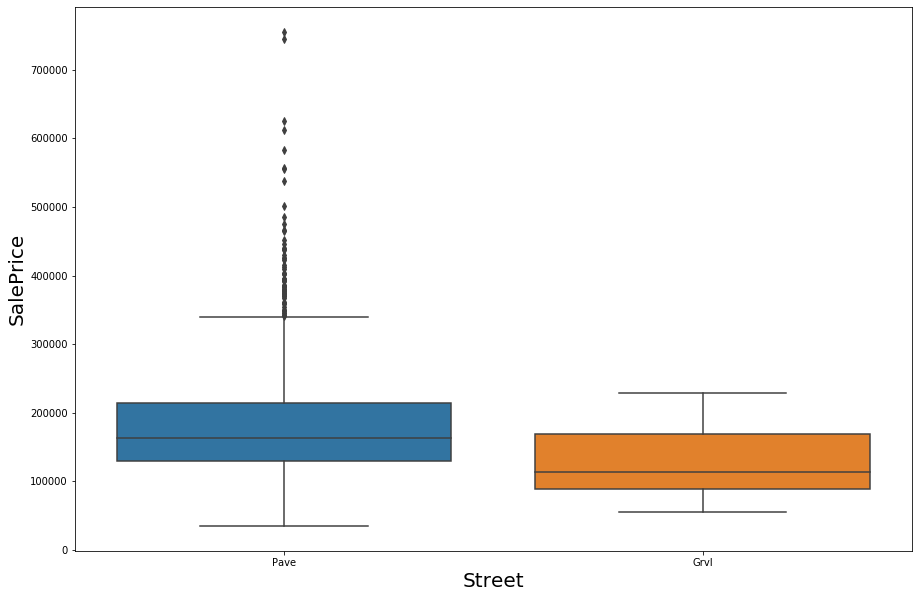

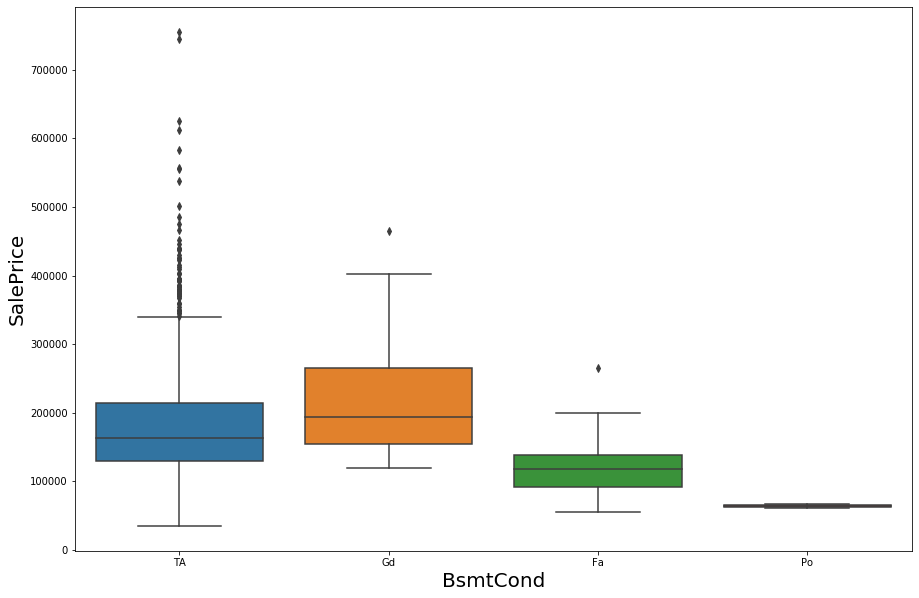

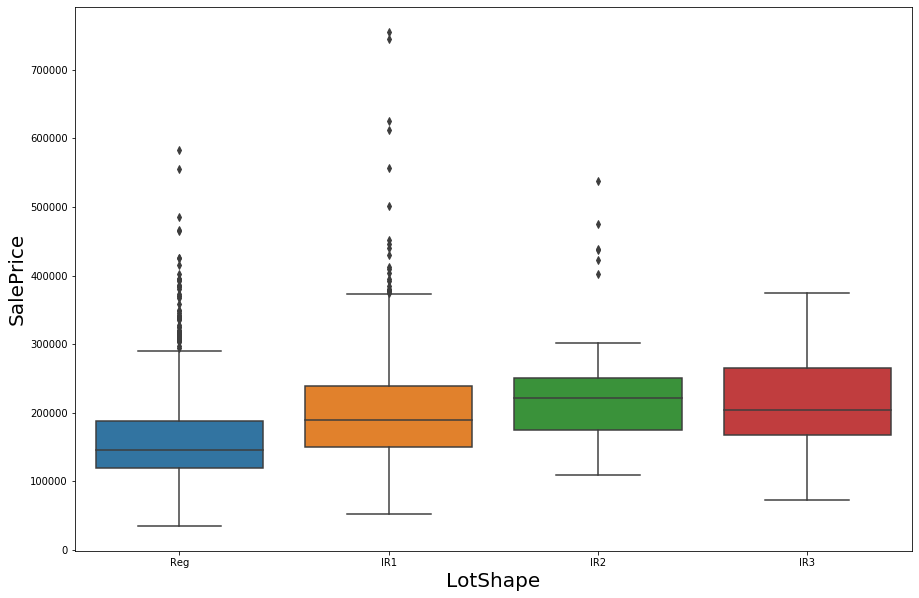

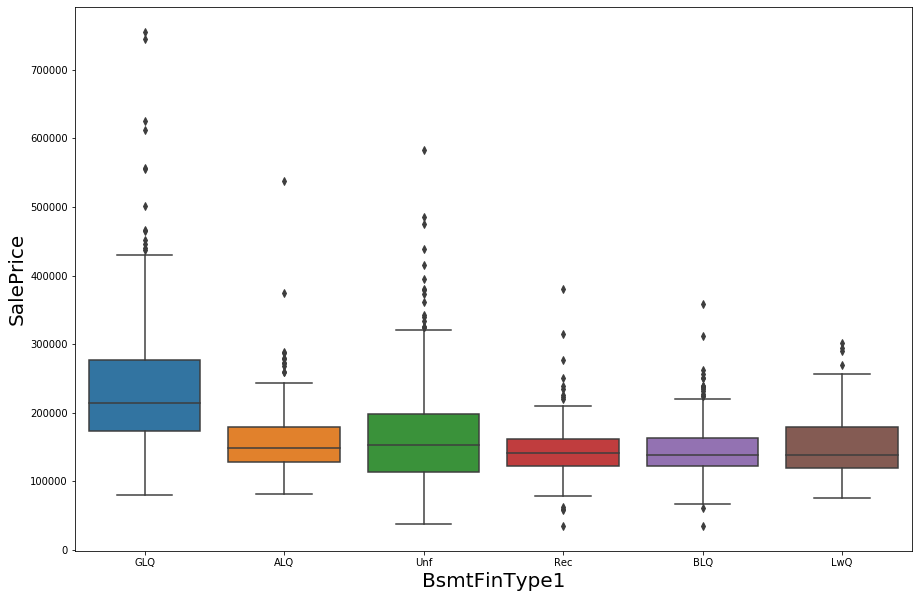

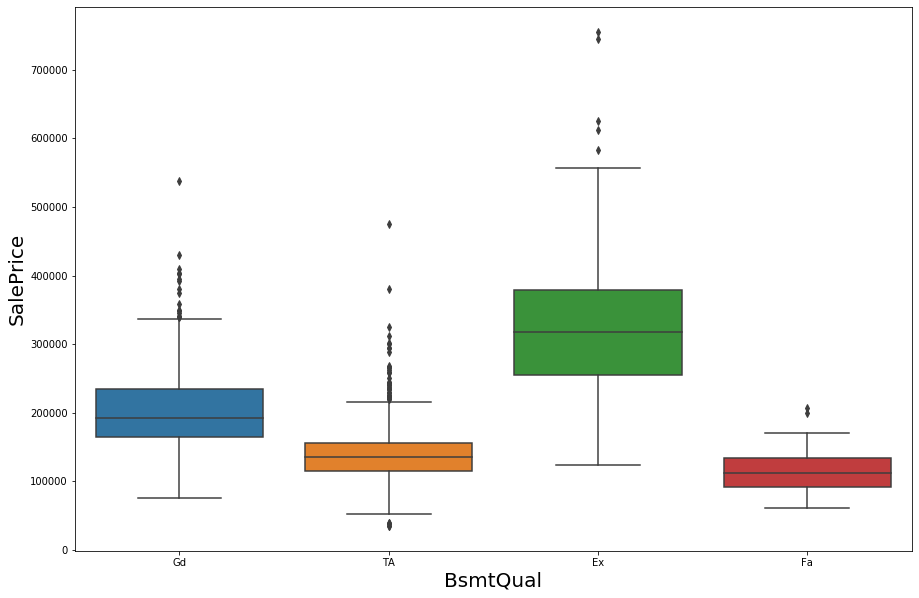

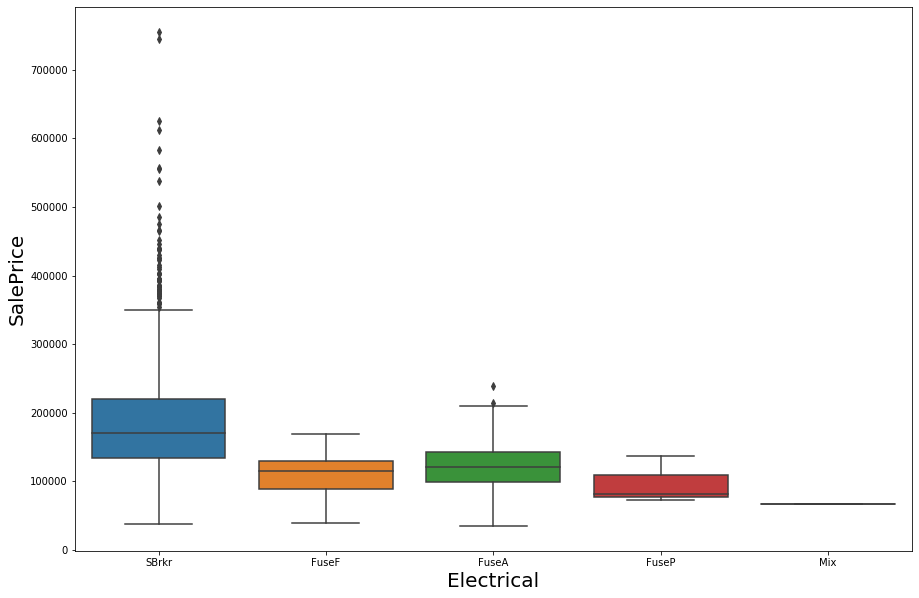

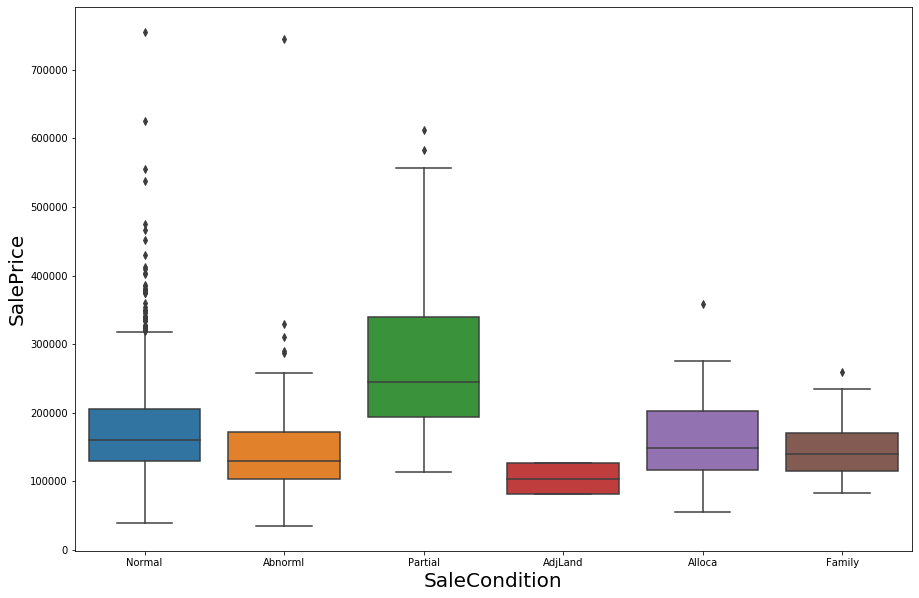

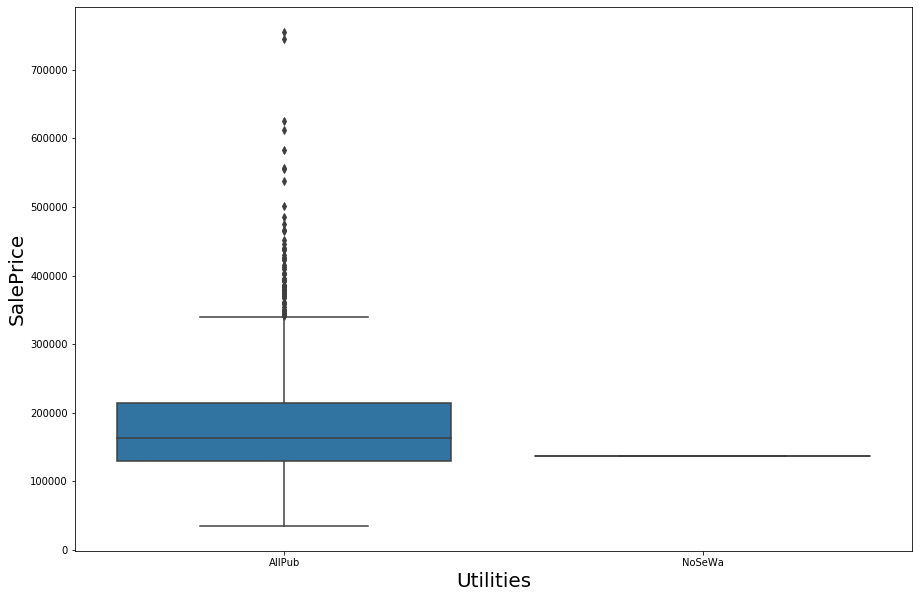

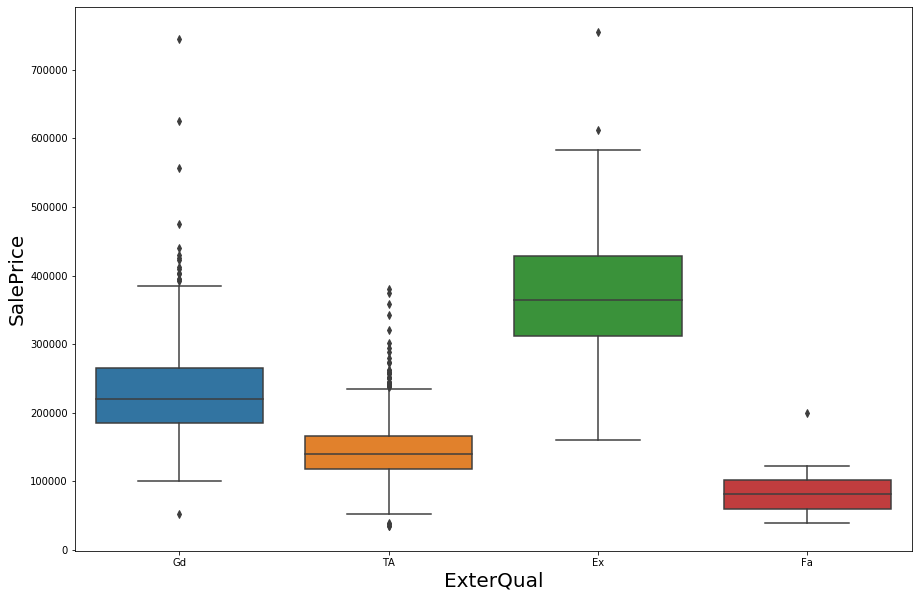

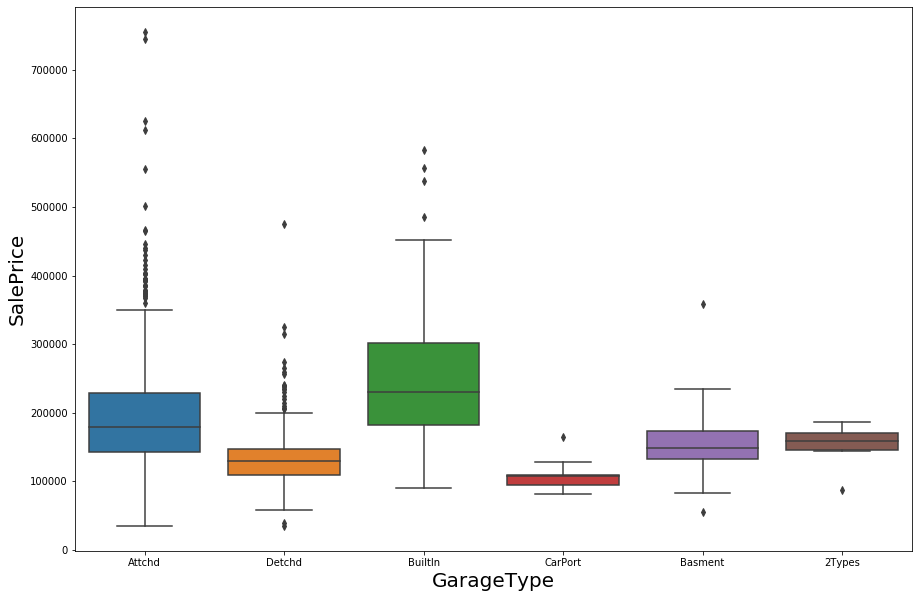

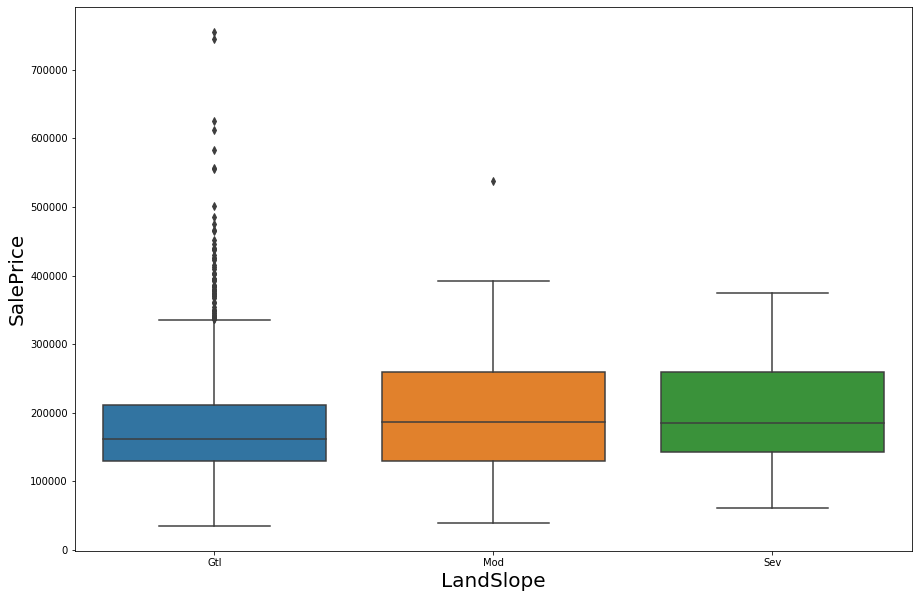

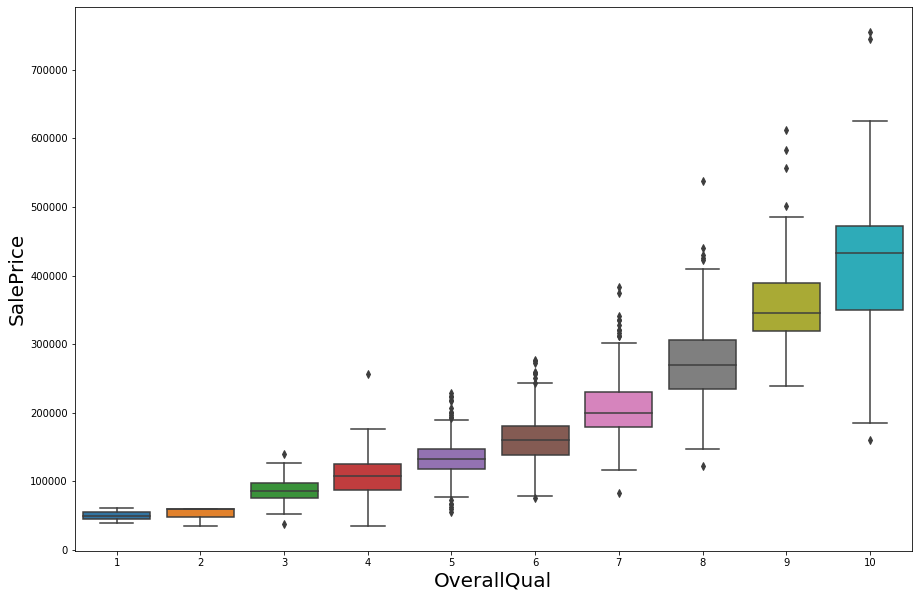

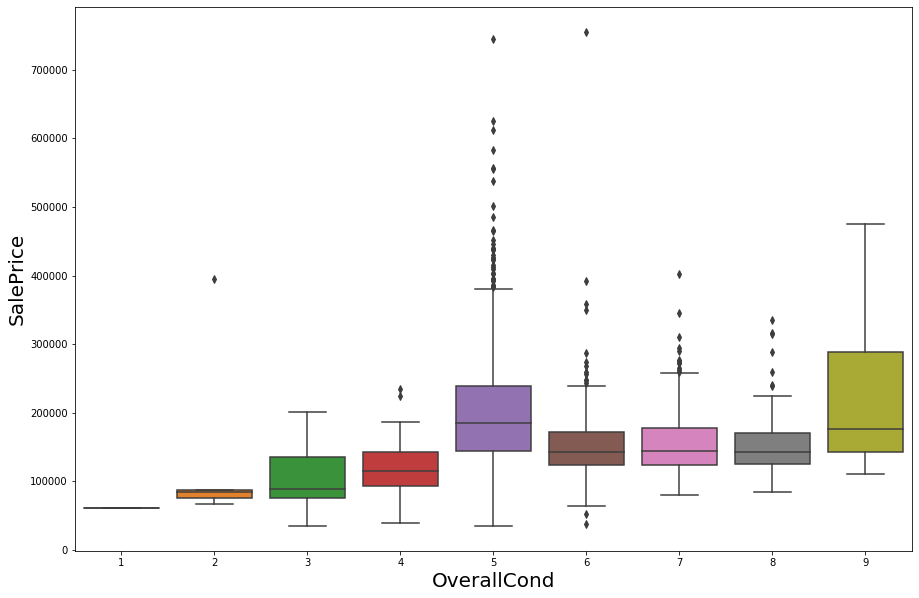

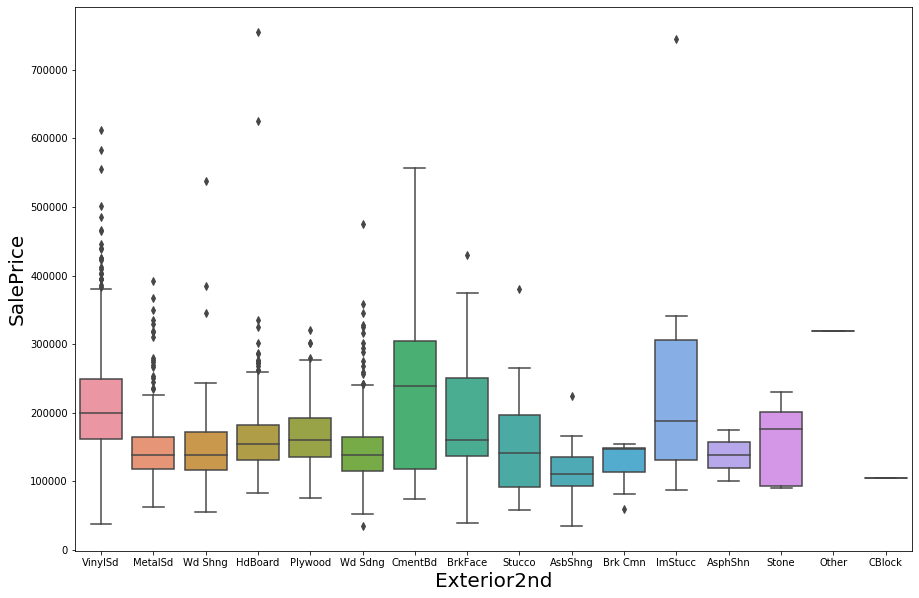

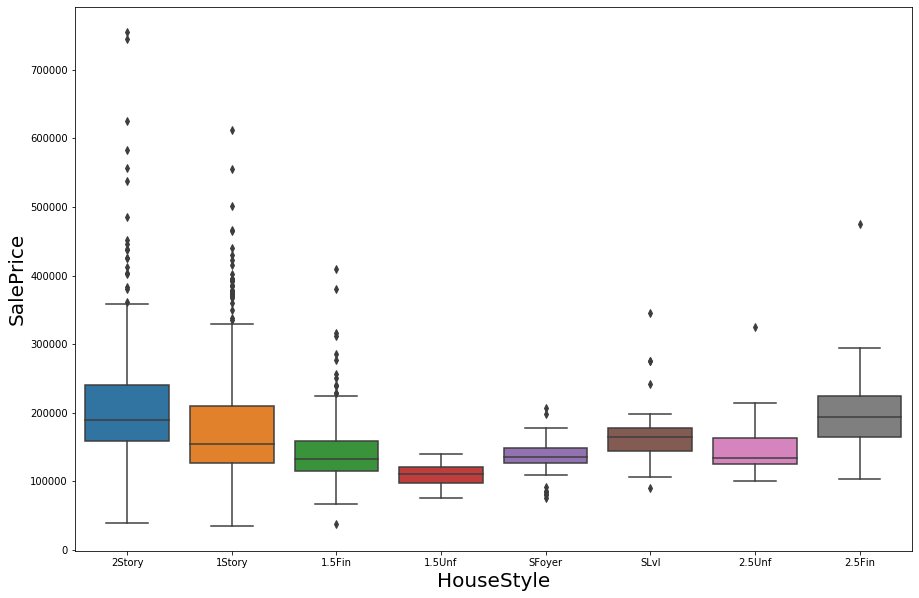

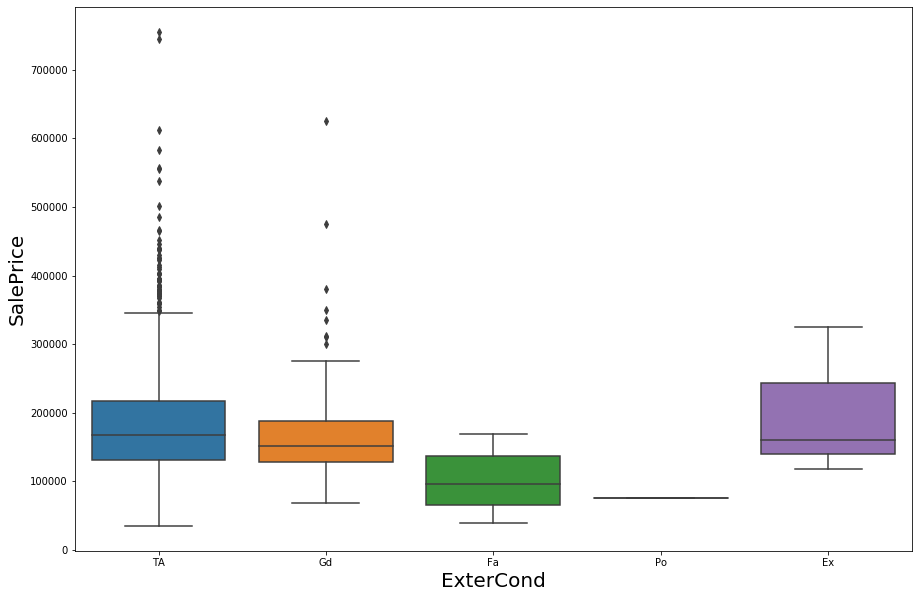

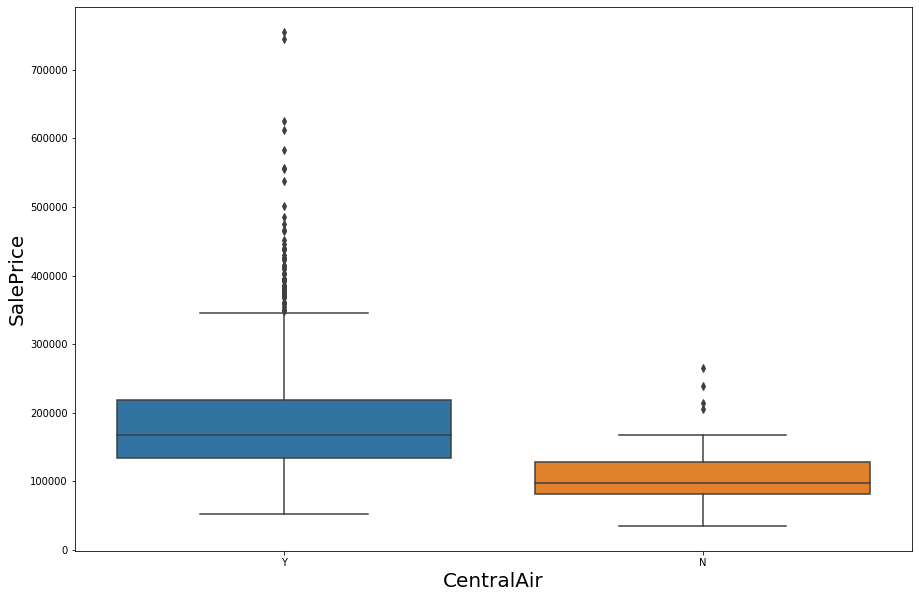

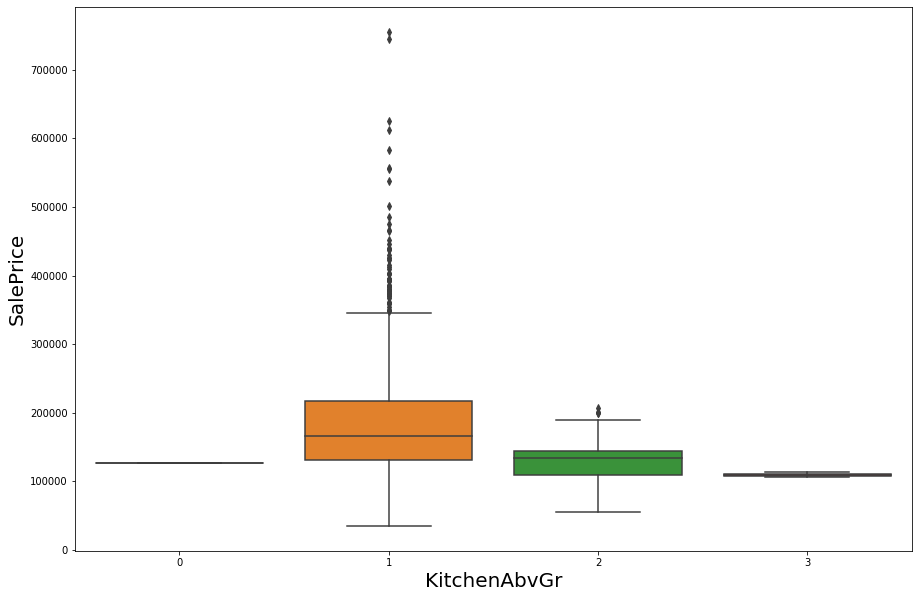

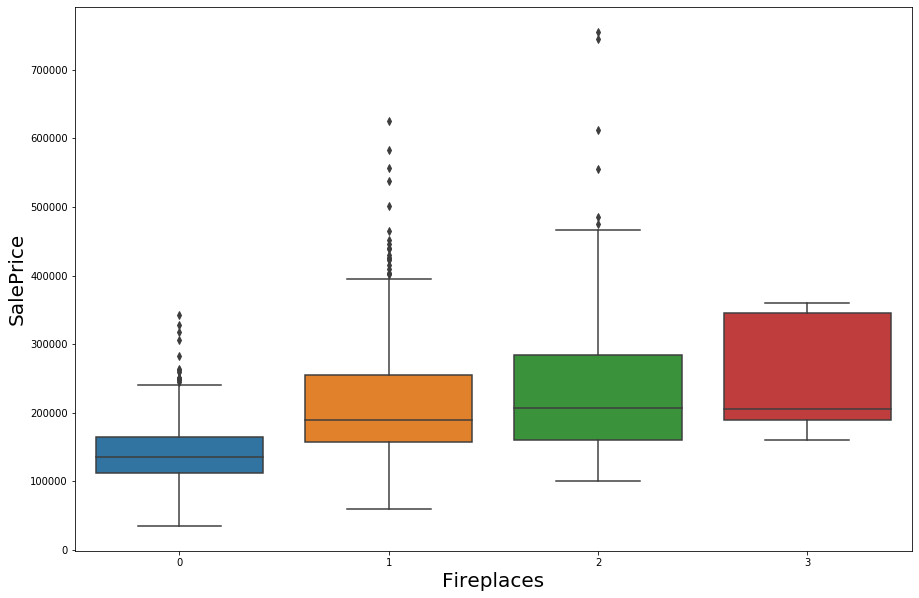

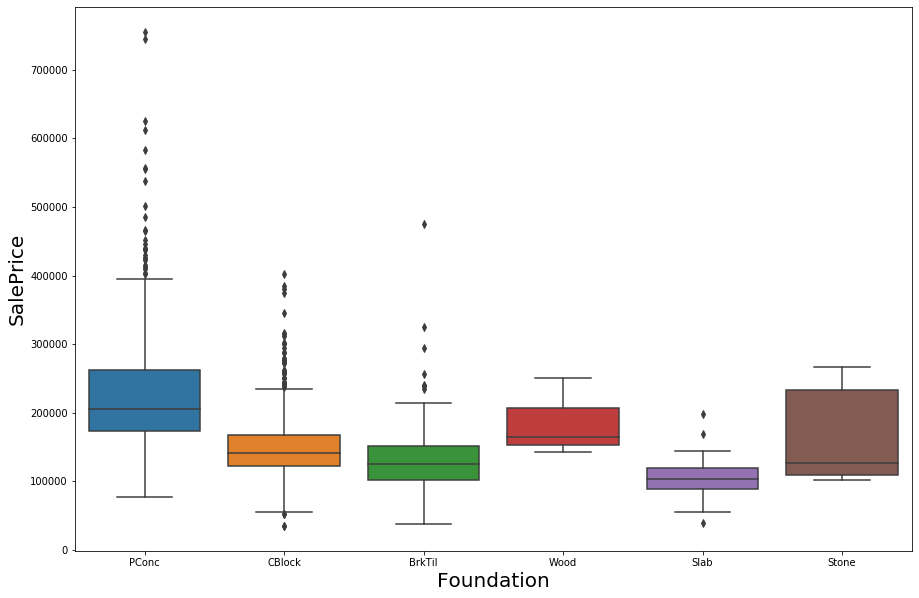

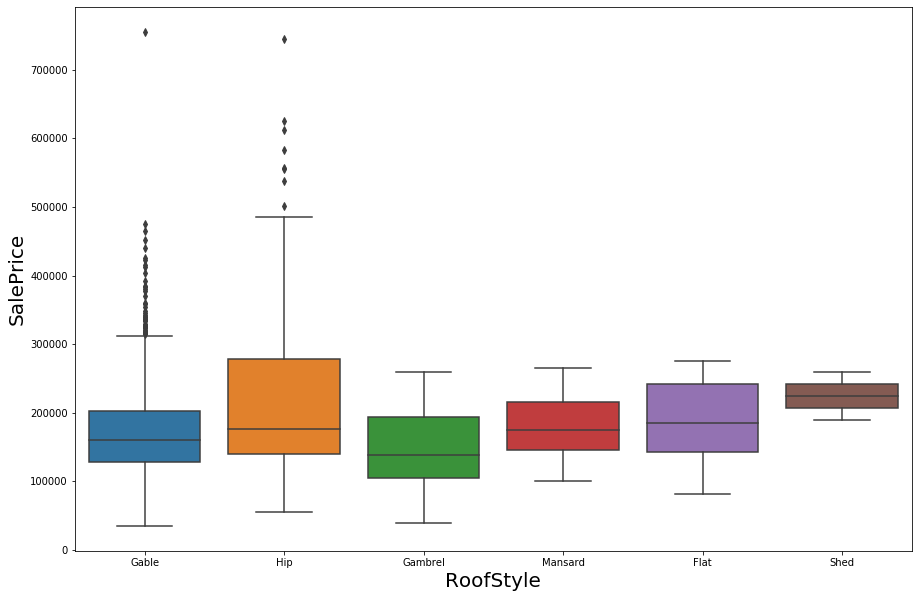

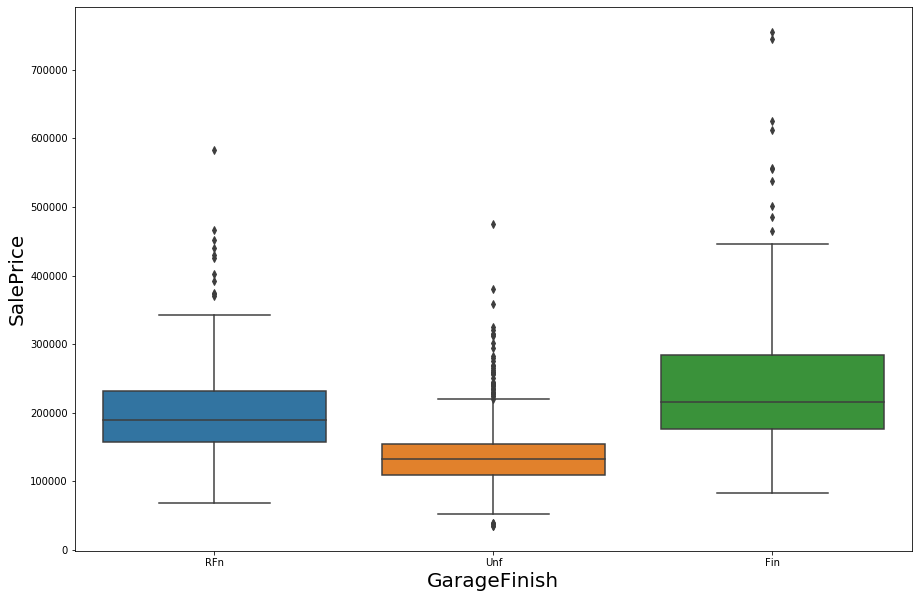

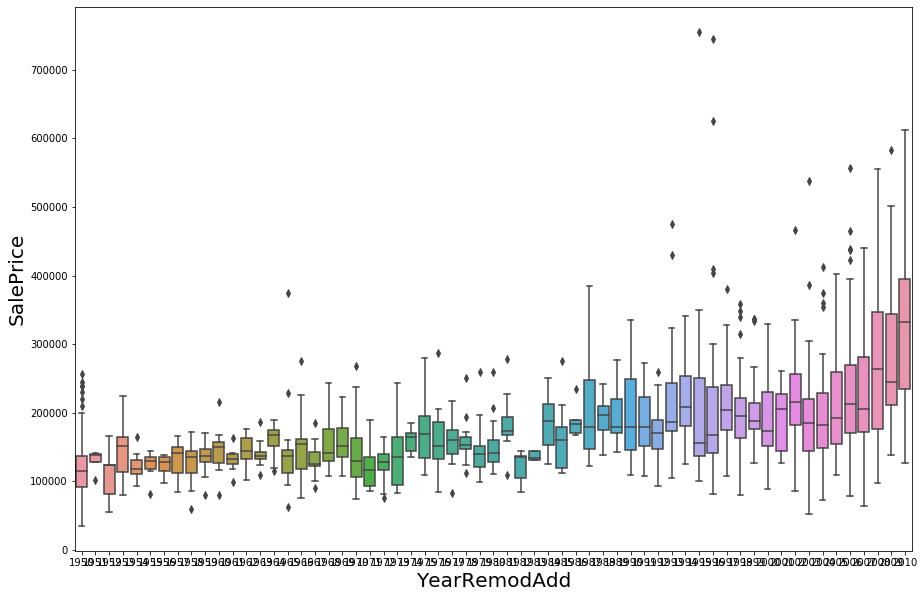

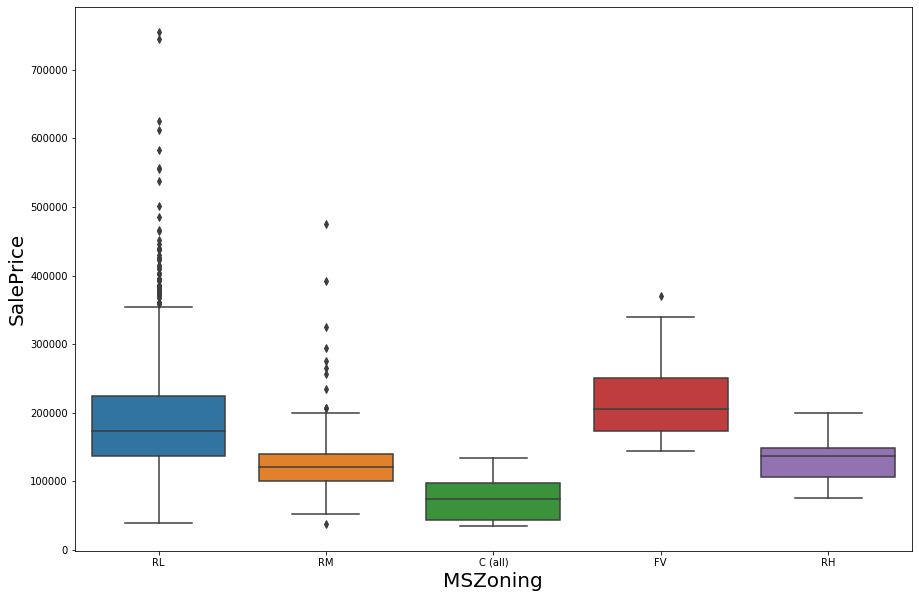

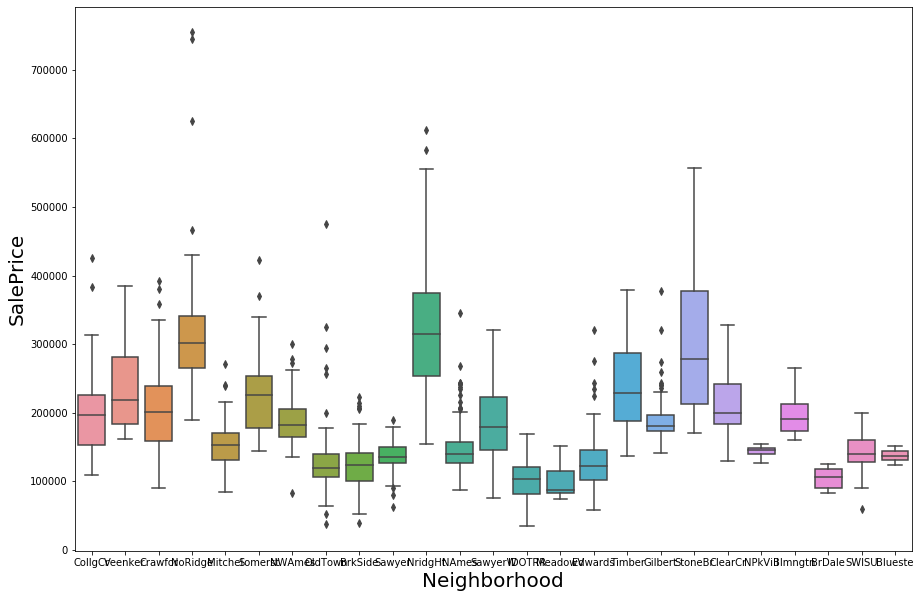

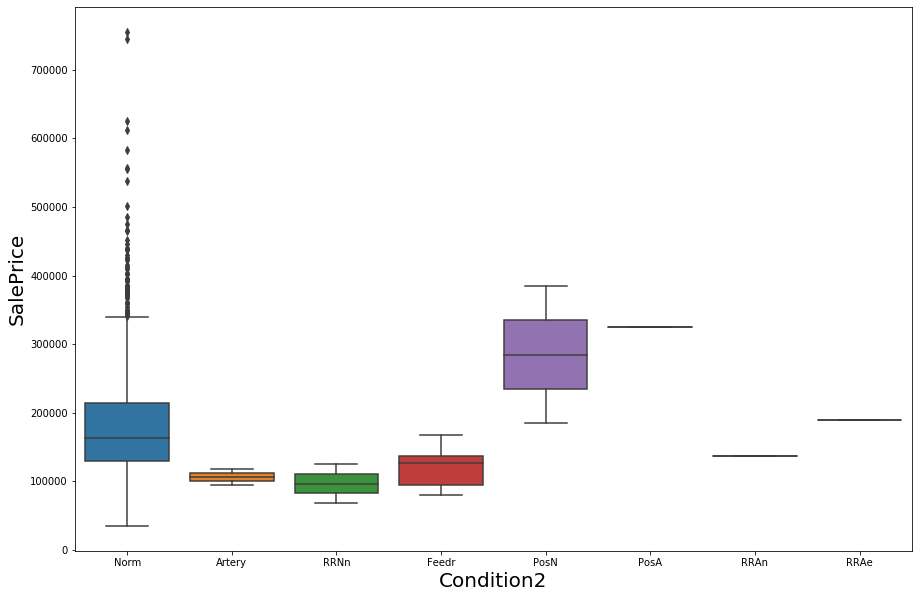

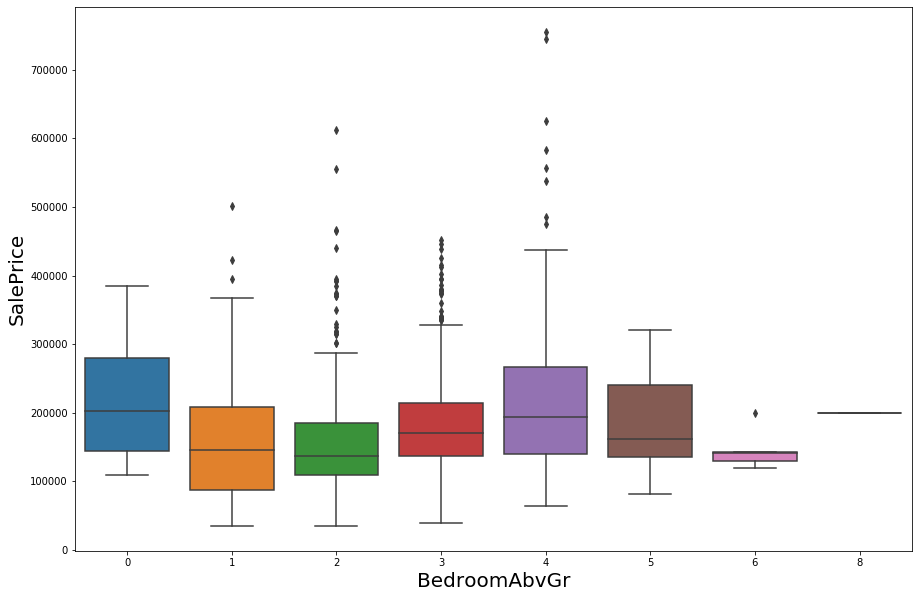

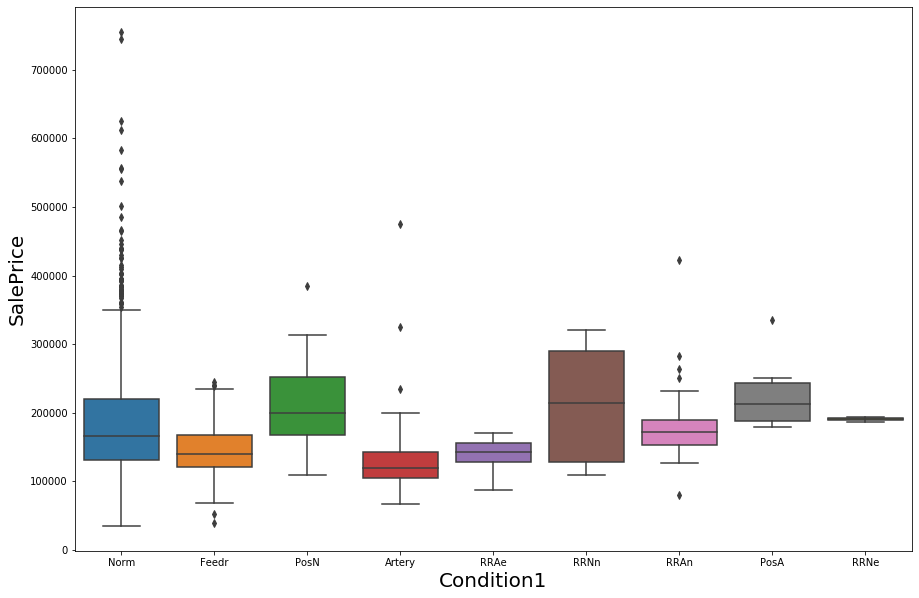

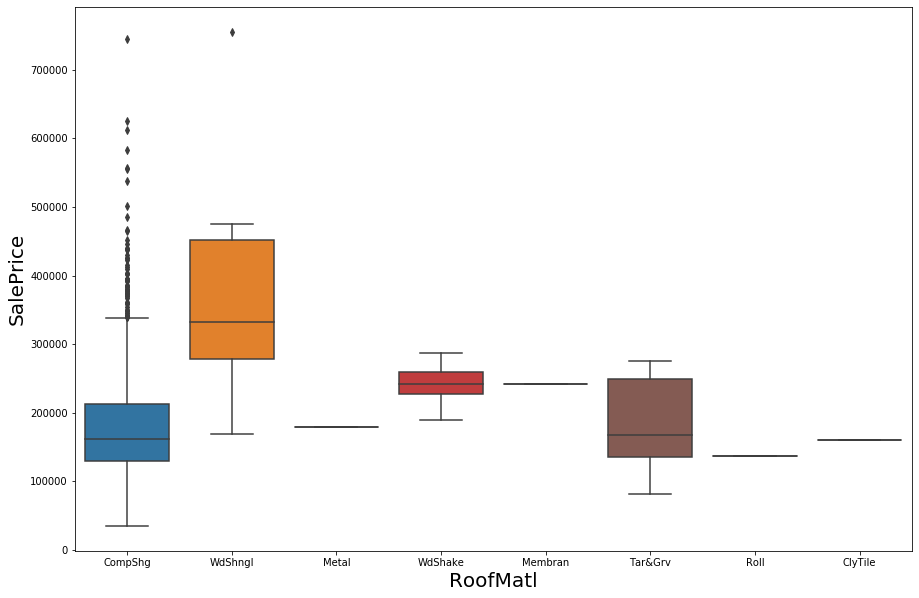

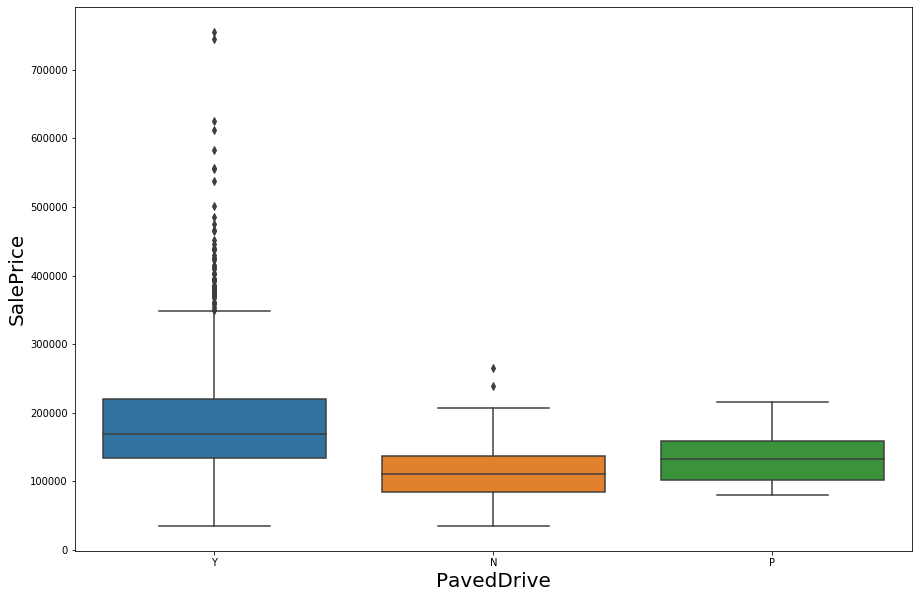

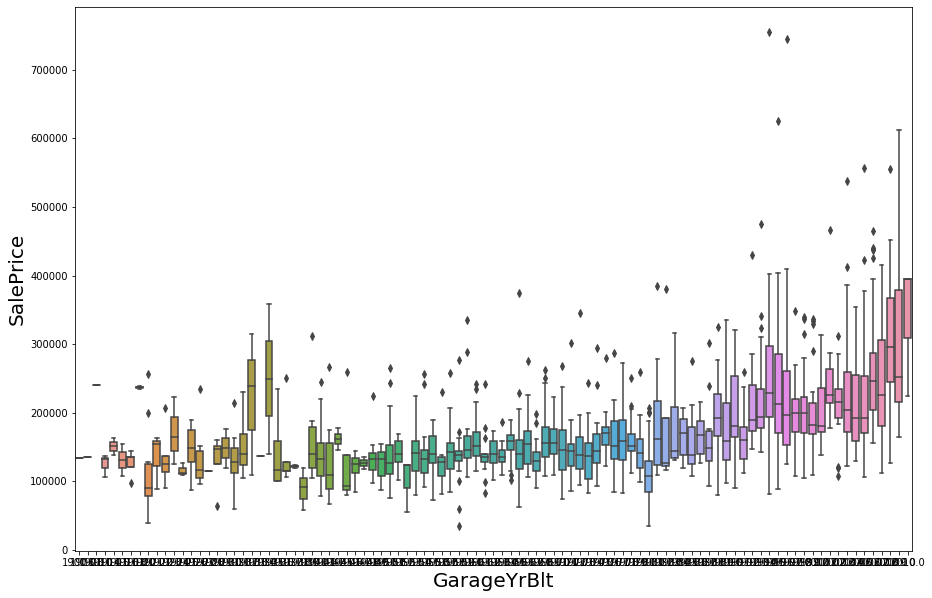

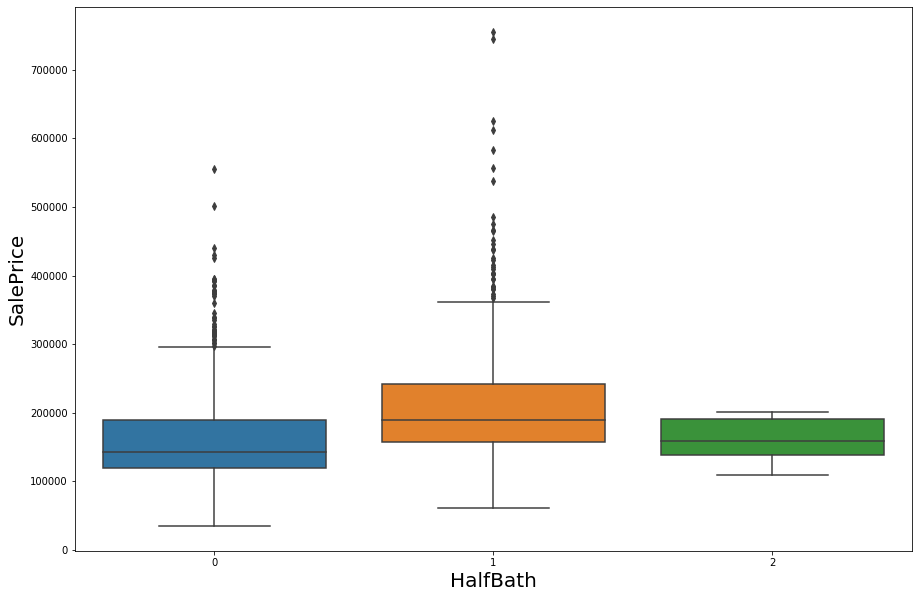

In [50]:
for items in categorical_col:
    sns.set_context( rc={"axes.labelsize":20})
    plt.figure(figsize=(15,10))
    sns.boxplot(x=items, y="SalePrice", data=df)
    plt.show()

### Creating dummy variables for categorical data

In [51]:
#categorical features
dummies= pd.get_dummies(df[categorical_col], drop_first=True)
df= pd.concat([df,dummies],axis=1)
df= df.drop(categorical_col, axis=1)


In [52]:
df.shape

(1459, 217)

In [53]:
df.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,house_age,LandContour_HLS,LandContour_Low,LandContour_Lvl,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Street_Pave,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,LotShape_IR2,LotShape_IR3,LotShape_Reg,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Utilities_NoSeWa,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,LandSlope_Mod,LandSlope_Sev,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,CentralAir_Y,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,GarageFinish_RFn,GarageFinish_Unf,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,PavedDrive_P,PavedDrive_Y
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,208500,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0

##  Splitting data into train & test


In [54]:
# splitting data into train & test
df_train, df_test= train_test_split(df, train_size=0.7, random_state=99)
print(df_train.shape)
print(df_test.shape)

(1021, 217)
(438, 217)


In [55]:
scaler= MinMaxScaler()

In [56]:
df_train[numeric_col]= scaler.fit_transform(df_train[numeric_col])
df_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,house_age,LandContour_HLS,LandContour_Low,LandContour_Lvl,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Street_Pave,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,LotShape_IR2,LotShape_IR3,LotShape_Reg,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Utilities_NoSeWa,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,LandSlope_Mod,LandSlope_Sev,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,CentralAir_Y,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,GarageFinish_RFn,GarageFinish_Unf,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,PavedDrive_P,PavedDrive_Y
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
163,0.253425,0.050078,0.14125,0.531416,0.000000,0.157919,0.480661,0.417070,0.0,0.0,0.277982,0.392330,0.000000,0.127971,0.0,0.0,0.0,0.0,0.0,0.257048,0.036765,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0

In [57]:
y_train= df_train.pop("SalePrice")
X_train = df_train
X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,house_age,LandContour_HLS,LandContour_Low,LandContour_Lvl,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Street_Pave,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,LotShape_IR2,LotShape_IR3,LotShape_Reg,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Utilities_NoSeWa,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,LandSlope_Mod,LandSlope_Sev,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,CentralAir_Y,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,GarageFinish_RFn,GarageFinish_Unf,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,PavedDrive_P,PavedDrive_Y
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
163,0.253425,0.050078,0.14125,0.531416,0.000000,0.157919,0.480661,0.417070,0.0,0.0,0.277982,0.392330,0.000000,0.127971,0.0,0.0,0.0,0.0,0.0,0.036765,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0

In [58]:
y_train.head()

Id
163     0.257048
681     0.150118
1295    0.111235
208     0.147341
1215    0.138314
Name: SalePrice, dtype: float64

### RFE & linear modelling

In [59]:
# Running RFE
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,25)
rfe= rfe.fit(X_train, y_train)

In [60]:
#Find the top features
list(zip(X_train.columns,rfe.support_, rfe.ranking_))

[('LotFrontage', False, 114),
 ('LotArea', True, 1),
 ('MasVnrArea', False, 91),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 26),
 ('BsmtUnfSF', False, 25),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 11),
 ('GrLivArea', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 158),
 ('OpenPorchSF', False, 112),
 ('EnclosedPorch', False, 131),
 ('3SsnPorch', False, 68),
 ('ScreenPorch', False, 65),
 ('PoolArea', True, 1),
 ('MiscVal', False, 45),
 ('house_age', False, 35),
 ('LandContour_HLS', False, 168),
 ('LandContour_Low', False, 90),
 ('LandContour_Lvl', False, 160),
 ('BldgType_2fmCon', False, 17),
 ('BldgType_Duplex', False, 16),
 ('BldgType_Twnhs', False, 77),
 ('BldgType_TwnhsE', False, 73),
 ('Exterior1st_AsphShn', False, 150),
 ('Exterior1st_BrkComm', False, 55),
 ('Exterior1st_BrkFace', False, 130),
 ('Exterior1st_CBlock', False, 15),
 ('Exterior1st_CemntBd', False, 44),
 ('Exterior1st_HdBoard', False, 97),
 ('E

In [61]:
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'GarageArea', 'PoolArea', 'GarageCond_Fa', 'GarageCond_Gd',
       'GarageCond_Po', 'GarageCond_TA', 'Functional_Sev', 'GarageQual_Fa',
       'GarageQual_Gd', 'GarageQual_Po', 'GarageQual_TA', 'SaleType_Con',
       'BsmtQual_TA', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA',
       'Condition2_PosN', 'Condition2_RRAe', 'RoofMatl_WdShngl'],
      dtype='object')

In [62]:
X_train_rfe = X_train[col]

In [63]:
X_train_rfe.shape

(1021, 25)

In [64]:
X_train_sm= sm.add_constant(X_train_rfe)

In [65]:
lm = sm.OLS(y_train, X_train_sm).fit()

In [66]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     219.6
Date:                Wed, 13 Jul 2022   Prob (F-statistic):               0.00
Time:                        10:02:27   Log-Likelihood:                 1767.8
No. Observations:                1021   AIC:                            -3484.
Df Residuals:                     995   BIC:                            -3355.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1549      0.033  

In [67]:
# Model prediction
y_train_pred = lm.predict(X_train_sm)

Text(0.5, 0, 'Errors')

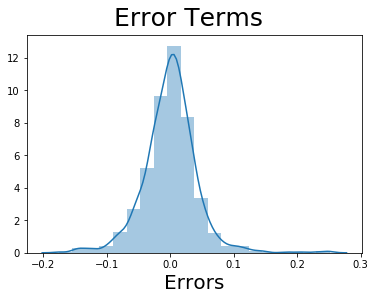

In [68]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 25)                 
plt.xlabel('Errors', fontsize = 20)  

In [71]:
df_test[numeric_col]= scaler.transform(df_test[numeric_col])
df_test.shape

(438, 217)

In [72]:
y_test= df_test.pop("SalePrice")
X_test = df_test
X_test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,house_age,LandContour_HLS,LandContour_Low,LandContour_Lvl,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Street_Pave,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,LotShape_IR2,LotShape_IR3,LotShape_Reg,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Utilities_NoSeWa,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,LandSlope_Mod,LandSlope_Sev,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,CentralAir_Y,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,GarageFinish_RFn,GarageFinish_Unf,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,PavedDrive_P,PavedDrive_Y
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
58,0.232877,0.047566,0.000000,0.000000,0.0,0.399443,0.268247,0.181755,0.416465,0.0,0.319208,0.416667,0.000000,0.127971,0.0,0.0,0.0,0.0,0.0,0.014706,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0

In [73]:
y_test.head()

Id
58      0.224413
887     0.152895
235     0.252187
1436    0.193168
675     0.145952
Name: SalePrice, dtype: float64

In [74]:
X_test_rfe = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_sm = sm.add_constant(X_test_rfe)
X_test.shape

(438, 216)

In [75]:
y_pred = lm.predict(X_test_sm)

### Residual Analysis

Text(0, 0.5, 'y_pred')

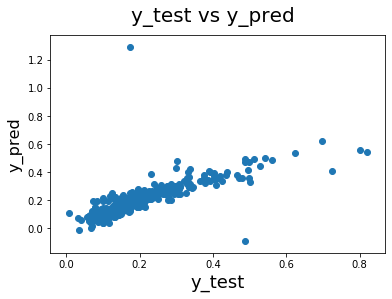

In [76]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)             
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_pred', fontsize=16)  

In [77]:
rss= np.sum(np.square(y_test-y_pred))
print("Residual sum of sqaures is: ",rss)
mse= mean_squared_error(y_test, y_pred)
print("Mean Sqaured error is: ", mse)
rmse = mse**0.5
print("Root mean seqaured error is:", rmse)

Residual sum of sqaures is:  2.526312676761936
Mean Sqaured error is:  0.0057678371615569315
Root mean seqaured error is: 0.07594627812840424


## Ridge regression

In [85]:
ridge= Ridge()
# list of alphas to tune
params = {'alpha':[0.001,.001,.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,20,50,100,500,1000]}
folds=5
ridge_reg = GridSearchCV(estimator = ridge, param_grid= params, scoring='neg_mean_squared_error', cv=folds,return_train_score = True, verbose = 1)
ridge_reg.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7,
                                   8, 9, 10, 20, 50, 100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=1)

In [88]:
print(ridge_reg.best_params_)
print(ridge_reg.best_score_)

{'alpha': 2}
-0.0017276164705937558


In [89]:
alpha = 2
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([ 2.01273595e-02,  6.64819066e-02,  1.12925474e-02,  6.21930697e-02,
        1.61638520e-02,  1.36734775e-02,  6.04556620e-02,  1.12577717e-01,
        1.09440113e-01, -4.20458209e-03,  1.26528955e-01,  5.21320154e-02,
        1.31215469e-02,  1.39645606e-02, -7.25155682e-03,  1.50497780e-02,
        2.81093252e-02,  7.41379070e-02,  8.16444769e-03, -2.42941946e-02,
        1.54013994e-02, -7.71687590e-03,  6.86384845e-03, -2.12898251e-02,
       -3.05858253e-02, -2.63129079e-02, -2.42276619e-02,  6.67411660e-03,
       -4.46735927e-03,  3.34607198e-02, -9.62513863e-03, -1.57673646e-02,
       -3.02525509e-03, -9.37518233e-03,  3.34540235e-03, -6.60061003e-03,
       -2.44209984e-03,  8.85300234e-03, -1.30229677e-02,  6.87640859e-03,
        7.48547691e-05,  4.65329376e-03,  1.85028993e-03, -8.44444364e-03,
       -4.10705813e-03,  8.66879641e-03,  5.56012633e-03,  4.02833804e-03,
        1.58245915e-02, -2.00283195e-02, -7.85389872e-03, -1.81005707e-02,
       -1.75919250e-02, -

In [90]:
#r2score,RSS and RMSE
y_pred_train = rfe.predict(X_train)
y_pred_test = rfe.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8465480626050715
0.5438215519143685
1.8734512482707328
2.526312676761928
0.0018349179708822066
0.005767837161556913


## Lasso regression

In [91]:
lasso = Lasso()

# cross validation
lasso_reg= GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            

lasso_reg.fit(X_train, y_train)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7,
                                   8, 9, 10, 20, 50, 100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [92]:
print(lasso_reg.best_params_)
print(lasso_reg.best_score_)

{'alpha': 0.001}
-0.029698995950362777


In [93]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [94]:
lasso_betas = pd.DataFrame(index=X_train.columns)
lasso_betas.rows = X_train.columns
lasso_betas['Lasso'] = lasso.coef_
lasso_betas.sort_values(by="Lasso", ascending=False).head(25)

,Lasso
GrLivArea,0.332251
TotalBsmtSF,0.058318
GarageArea,0.056741
BsmtFinSF1,0.045802
Neighborhood_NridgHt,0.035357
Neighborhood_NoRidge,0.026913
BsmtExposure_Gd,0.018490
Functional_Typ,0.017526
SaleType_New,0.016338
CentralAir_Y,0.015333


In [95]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8323208538733494
0.7474934117530769
2.0471472107352247
1.3983795103234713
0.002005041342541846
0.003192647283843542
